# Foxintelligence case

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import missingno as msno
from wordcloud import WordCloud, STOPWORDS

In [2]:
def wordcloud(corpus, title=None, mask=None, figsize=(10, 10)):
    """
    Draws a word cloud with an optional mask shape, using the wordcloud package.

    Parameters
    ----------
    
    corpus: list
        List of all individual words to be used for the word cloud.
    
    title: string, optional, default: None
        The title of your word cloud.

    mask: string, optional, default: None
        The path to the image to be used as mask. It must be binary (black & white).
        
    figsize: tuple, optional, default: (10,10)
        The size of the chart area.
    """
    
    # preprocess data
    corpus = str(corpus).replace("'", "")
    
    # load mask if provided
    if mask != None:
        mask_ = Image.open(mask)
        fn = lambda x : 255 if x >= 200 else 0
        mask_ = mask_.convert('L').point(fn, mode='1').convert('RGB')
        mask_ = np.array(mask_)
    else: 
        mask_ = None
    
    wordcloud = WordCloud(
        background_color = 'white',
        mask = mask_,
        max_font_size = 45,
        min_font_size = 5,
        contour_width = 0.1,
        contour_color = 'silver',
        repeat = True,
        stopwords=STOPWORDS,
        random_state = 1).generate(str(corpus))
    
    fig = plt.figure(1, figsize=figsize)
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=18, y=0.75)
    plt.imshow(wordcloud)

files:
- 20210128174810_databird-synthesized-products-extract.csv
- 20210128174840_databird-synthesized-customers-aggregated-extract.csv
- 20210128174739_databird-synthesized-transactions-extract.csv

# Customers exploration

## loading & cleaning

In [2]:
customers=pd.read_csv('20210128174840_databird-synthesized-customers-aggregated-extract.csv')

In [127]:
customers.head()

,year_month,merchant_name,order_item_delivery_address_region,count_customers
0,2017-01,deliveroo,idf - paris,544
1,2017-01,deliveroo,idf - rest of idf,121
2,2017-01,deliveroo,other region,636
3,2017-01,just eat,idf - paris,167
4,2017-01,just eat,idf - rest of idf,358


In [145]:
customers.tail()

,year_month,merchant_name,order_item_delivery_address_region,count_customers
373,2020-06-01,just eat,idf - rest of idf,684
374,2020-06-01,just eat,other region,769
375,2020-06-01,uber eats,idf - paris,2019
376,2020-06-01,uber eats,idf - rest of idf,3278
377,2020-06-01,uber eats,other region,7867


In [128]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   year_month                          378 non-null    object
 1   merchant_name                       378 non-null    object
 2   order_item_delivery_address_region  378 non-null    object
 3   count_customers                     378 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.9+ KB


In [146]:
customers.nunique()

year_month                             42
merchant_name                           3
order_item_delivery_address_region      3
count_customers                       326
dtype: int64

In [147]:
customers.isnull().sum()

year_month                            0
merchant_name                         0
order_item_delivery_address_region    0
count_customers                       0
dtype: int64

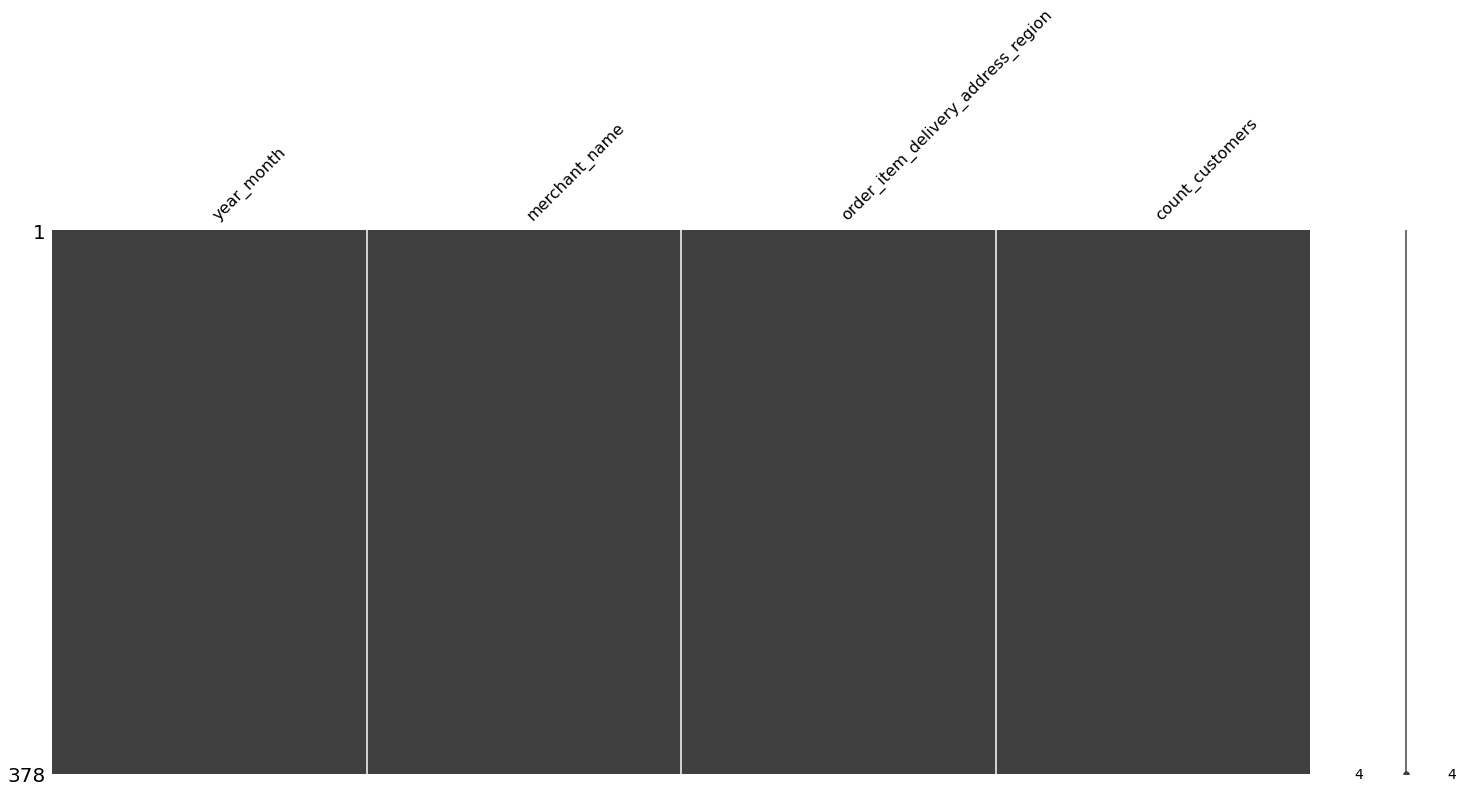

In [229]:
msno.matrix(customers);

In [149]:
customers.duplicated().sum()

0

## year_month, merchant_name, order_item_delivery_address_region categories

In [129]:
ccol = list(customers.columns)

In [130]:
ccol.remove('count_customers')

In [131]:
for c in ccol:
    print(customers[c].unique())

['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06']
['deliveroo' 'just eat' 'uber eats']
['idf - paris' 'idf - rest of idf' 'other region']


In [28]:
pd.to_datetime(customers['year_month'][0])

Timestamp('2017-01-01 00:00:00')

In [133]:
ym_list=list(customers['year_month'].unique())
ym_list

['2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06']

In [45]:
customers['year_month']=customers['year_month'].apply(pd.to_datetime)

In [135]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   year_month                          378 non-null    datetime64[ns]
 1   merchant_name                       378 non-null    object        
 2   order_item_delivery_address_region  378 non-null    object        
 3   count_customers                     378 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.9+ KB


In [46]:
merchants=customers['merchant_name'].unique()
merchants

array(['deliveroo', 'just eat', 'uber eats'], dtype=object)

In [137]:
regions=customers['order_item_delivery_address_region'].unique()
regions

array(['idf - paris', 'idf - rest of idf', 'other region'], dtype=object)

In [42]:
customers[customers['merchant_name']=='deliveroo']

,year_month,merchant_name,order_item_delivery_address_region,count_customers
0,2017-01-01,deliveroo,idf - paris,544
1,2017-01-01,deliveroo,idf - rest of idf,121
2,2017-01-01,deliveroo,other region,636
9,2017-02-01,deliveroo,idf - paris,551
10,2017-02-01,deliveroo,idf - rest of idf,133
...,...,...,...,...
361,2020-05-01,deliveroo,idf - rest of idf,857
362,2020-05-01,deliveroo,other region,2948
369,2020-06-01,deliveroo,idf - paris,1319
370,2020-06-01,deliveroo,idf - rest of idf,849


## plots

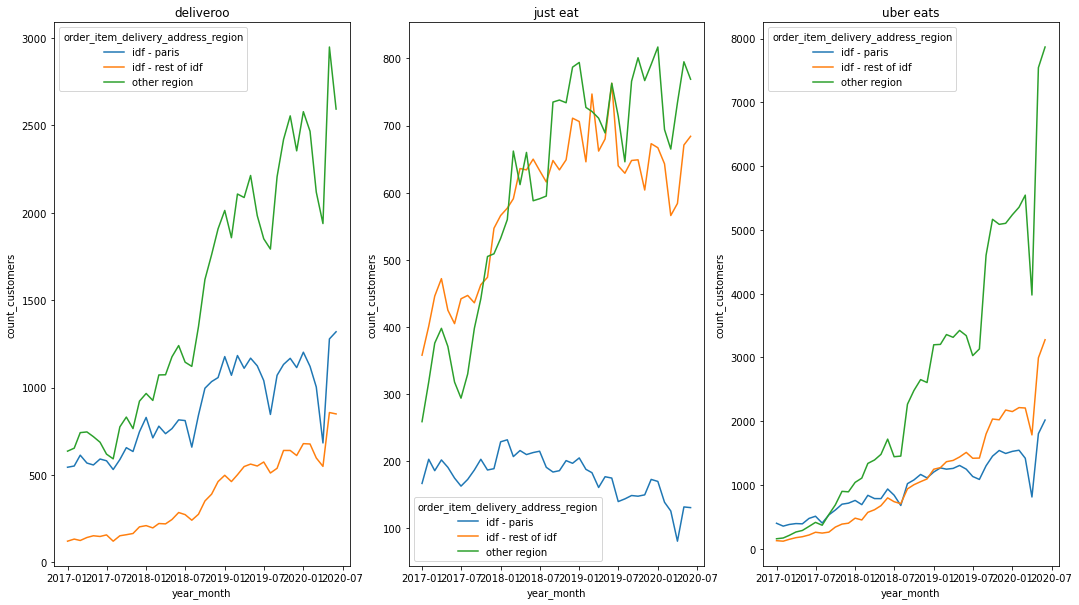

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
for i,m in enumerate(merchants): 
    axes[i].set_title(m)
#    axes[i].set_xticklabels(ym_list, rotation=45);    
    sns.lineplot(ax=axes[i], data=customers[customers['merchant_name']==m], x='year_month', 
                y='count_customers', hue='order_item_delivery_address_region');

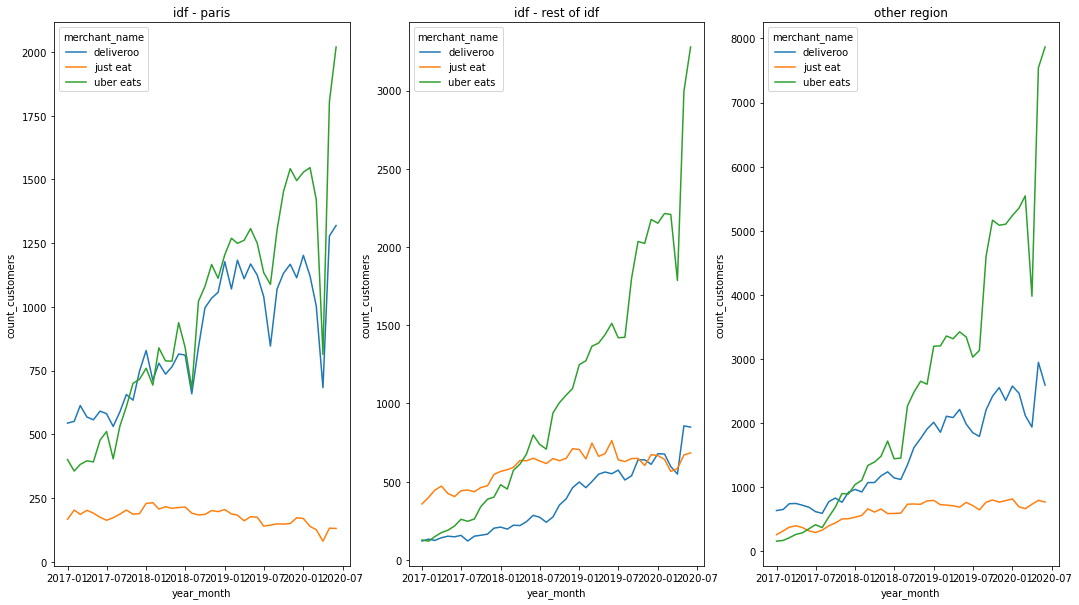

In [141]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i,r in enumerate(regions): 
    axes[i].set_title(r)
#    axes[i].set_xticklabels(ym_list, rotation=45);
    sns.lineplot(ax=axes[i], data=customers[customers['order_item_delivery_address_region']==r], x='year_month', 
                y='count_customers', hue='merchant_name');

In [48]:
merchants, regions

(array(['deliveroo', 'just eat', 'uber eats'], dtype=object),
 array(['idf - paris', 'idf - rest of idf', 'other region'], dtype=object))

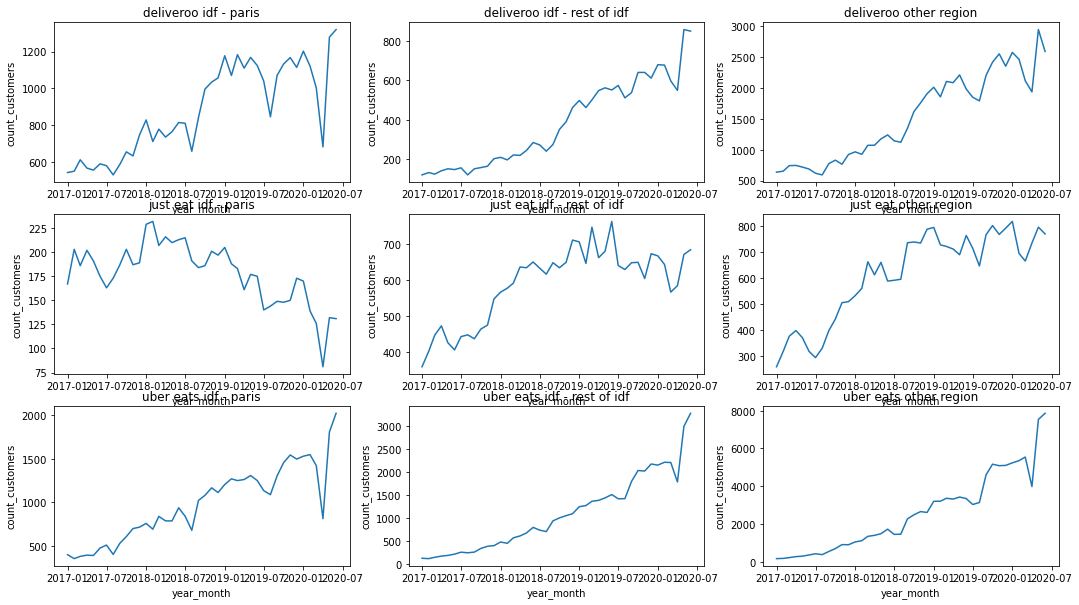

In [95]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
for i, m in enumerate(merchants):
    for j, r in enumerate(regions):
        axes[i,j].set_title(m+' '+r)
        sns.lineplot(ax=axes[i, j], data=customers[(customers['merchant_name']==m) & (customers['order_item_delivery_address_region']==r) ],
                     x='year_month', y='count_customers');

In [49]:
customers

,year_month,merchant_name,order_item_delivery_address_region,count_customers
0,2017-01-01,deliveroo,idf - paris,544
1,2017-01-01,deliveroo,idf - rest of idf,121
2,2017-01-01,deliveroo,other region,636
3,2017-01-01,just eat,idf - paris,167
4,2017-01-01,just eat,idf - rest of idf,358
...,...,...,...,...
373,2020-06-01,just eat,idf - rest of idf,684
374,2020-06-01,just eat,other region,769
375,2020-06-01,uber eats,idf - paris,2019
376,2020-06-01,uber eats,idf - rest of idf,3278


In [58]:
customers[customers.year_month.dt.year==2017].pivot_table(values='count_customers',
                      index='year_month', columns=['merchant_name'], 
                     aggfunc=sum)

merchant_name,deliveroo,just eat,uber eats
year_month,,,
2017-01-01,1301,784,687
2017-02-01,1337,922,646
2017-03-01,1480,1008,742
2017-04-01,1456,1072,835
2017-05-01,1428,987,870
2017-06-01,1426,898,1046
2017-07-01,1357,899,1186
2017-08-01,1244,950,1021
2017-09-01,1515,1021,1332


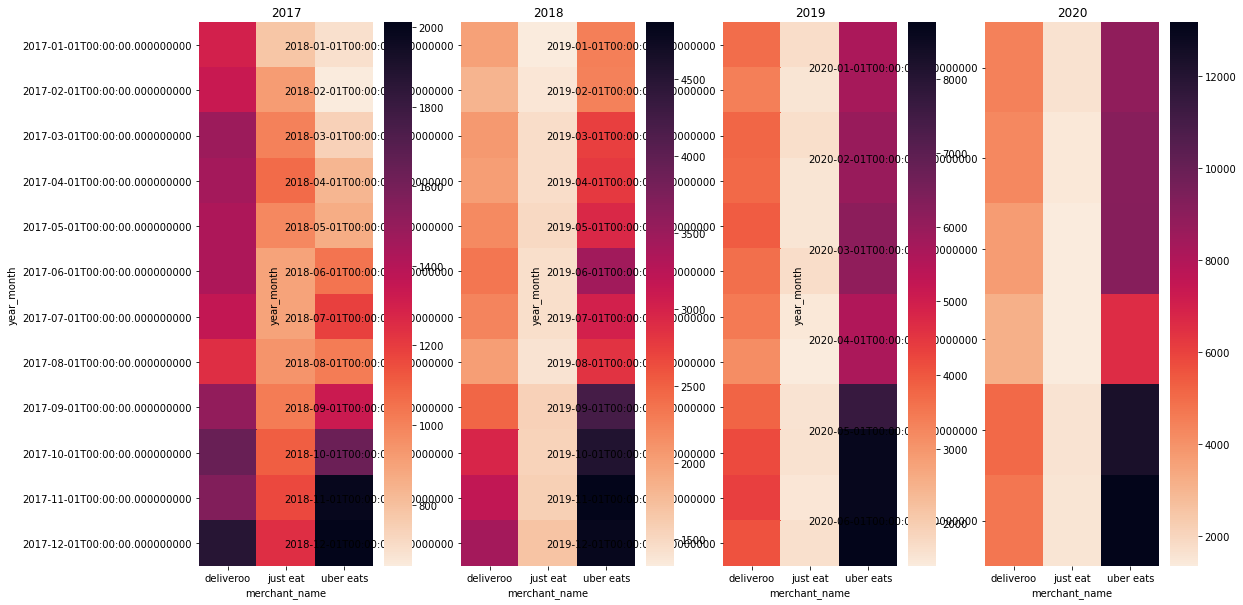

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(18, 10))

for y in range(2017, 2021): 
    axes[y-2017].set_title(y)
    table = customers[customers.year_month.dt.year==y].pivot_table(values='count_customers',
                      index='year_month', columns=['merchant_name'], 
                     aggfunc=sum)
    sns.heatmap(table, ax=axes[y-2017], cmap=sns.cm.rocket_r);

In [65]:
customers['year'] = customers.year_month.dt.year
customers['month'] = customers.year_month.dt.month

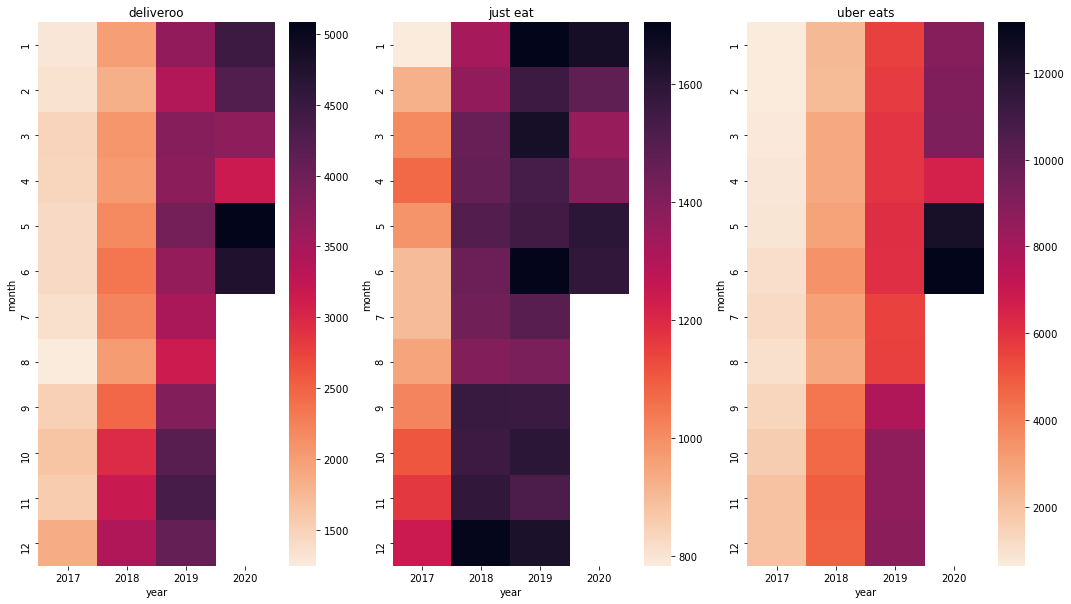

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i,m in enumerate(merchants): 
    axes[i].set_title(m)
    table = customers[customers.merchant_name==m].pivot_table(values='count_customers',
                      index='month', columns=['year'], aggfunc=sum)
    sns.heatmap(table, ax=axes[i], cmap=sns.cm.rocket_r);

## region grouping

In [6]:
def region_group(x):
    if x=='other region':
        r=x
    else:
        r='idf'
    return r

In [8]:
customers['region']=customers.order_item_delivery_address_region.apply(region_group)

In [11]:
customers_by_region = customers.groupby(['year_month','region'], as_index=False).sum()
customers_by_region

,year_month,region,count_customers
0,2017-01,idf,1719
1,2017-01,other region,1053
2,2017-02,idf,1764
3,2017-02,other region,1141
4,2017-03,idf,1901
...,...,...,...
79,2020-04,other region,6651
80,2020-05,idf,7737
81,2020-05,other region,11286
82,2020-06,idf,8280


In [12]:
customers_by_region.pivot(index='year_month', columns='region', values='count_customers')

region,idf,other region
year_month,,
2017-01,1719,1053
2017-02,1764,1141
2017-03,1901,1329
2017-04,1955,1408
2017-05,1907,1378
2017-06,2013,1357
2017-07,2114,1328
2017-08,1923,1292
2017-09,2157,1711


#  Products exploration

## loading & cleaning

In [140]:
products=pd.read_csv('20210128174810_databird-synthesized-products-extract.csv')

In [151]:
products.head()

,f0_,id_order,product_name,product_description,merchant_name
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,NaN,deliveroo
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,sauce soja,deliveroo
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,"sauce soja sucree, baguettes, sauce soja sucre...",deliveroo
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,any three skewers with lamb & chicken doner se...,deliveroo
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,NaN,deliveroo


In [152]:
products.tail()

,f0_,id_order,product_name,product_description,merchant_name
1711611,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,NaN,uber eats
1711612,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711613,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711614,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,NaN,deliveroo
1711615,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,menu french,NaN,deliveroo


In [153]:
products.columns

Index(['f0_', 'id_order', 'product_name', 'product_description',
       'merchant_name'],
      dtype='object')

In [154]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711616 entries, 0 to 1711615
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   f0_                  object
 1   id_order             object
 2   product_name         object
 3   product_description  object
 4   merchant_name        object
dtypes: object(5)
memory usage: 65.3+ MB


In [74]:
products.columns=['date', 'id_order', 'product_name', 'product_description',
       'merchant_name']

In [156]:
products.columns

Index(['date', 'id_order', 'product_name', 'product_description',
       'merchant_name'],
      dtype='object')

1711616

<AxesSubplot:>

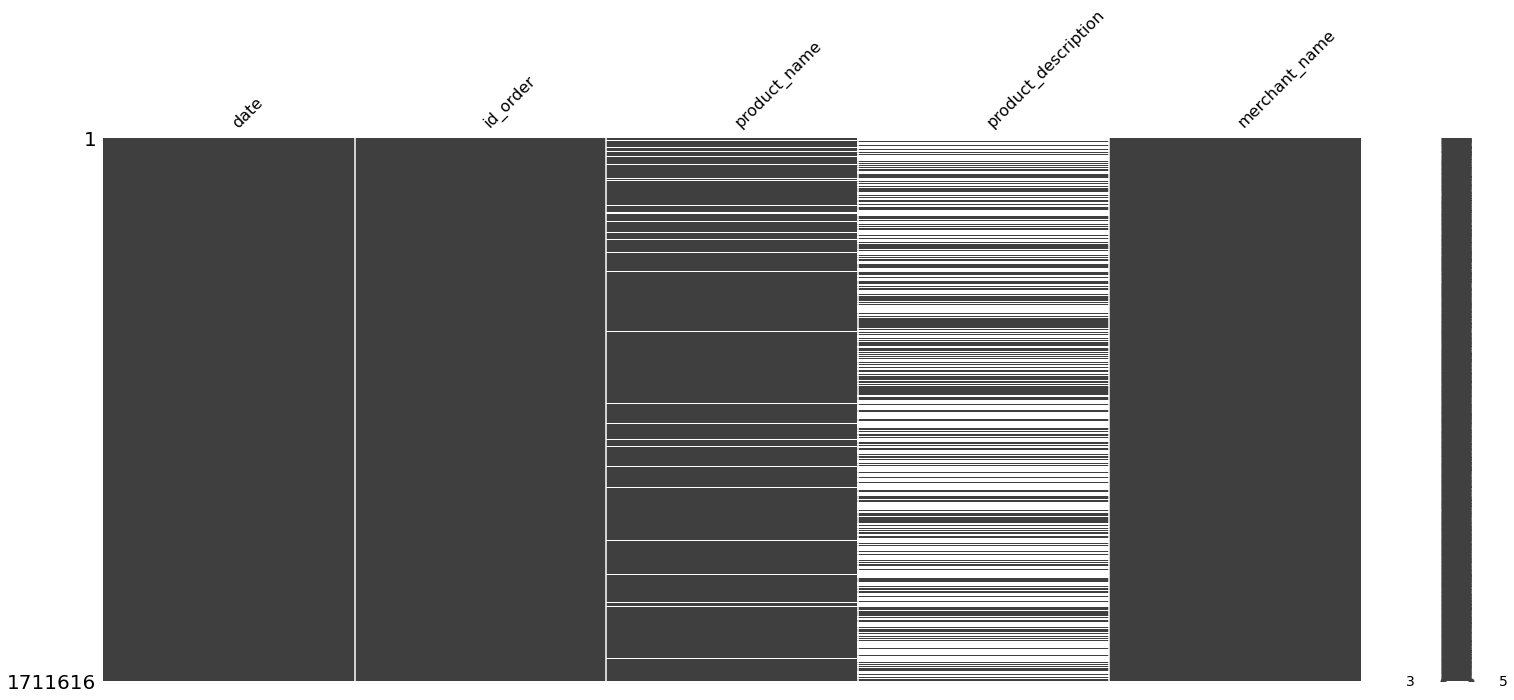

In [232]:
msno.matrix(products)

In [157]:
products.nunique()

date                     1277
id_order               807731
product_name           160427
product_description      9770
merchant_name               3
dtype: int64

In [159]:
products.isnull().sum()

date                         0
id_order                     0
product_name            104318
product_description    1010013
merchant_name                0
dtype: int64

In [160]:
products.isna().sum()

date                         0
id_order                     0
product_name            104318
product_description    1010013
merchant_name                0
dtype: int64

In [163]:
products[products['product_name'].isna()]

,date,id_order,product_name,product_description,merchant_name
60,2017-01-01,P6xd4ZAo/Dihcjy1TXPiqyCt7nk=,NaN,leavened tandoori breadcontains gluten,deliveroo
226,2017-01-01,tC08Q1jPs/N2mVZx5Ohu9ElEY2Q=,NaN,NaN,just eat
265,2017-01-01,0Bsx0296z5bVrEXU0Cyl5Ls7h2I=,NaN,NaN,just eat
292,2017-01-01,7DyJBwtDa/dm2eGpaf8uwxgNdu4=,NaN,NaN,just eat
459,2017-01-02,auRyvMXEzpidzm7RSMvQlDYbQ20=,NaN,NaN,just eat
...,...,...,...,...,...
1711370,2020-06-30,6+pF/QTeCwANHKmK/33yNd6cEZA=,NaN,NaN,just eat
1711468,2020-06-30,8/+vWJPgyMnANc3xKPAdI2jqAKw=,NaN,NaN,just eat
1711486,2020-06-30,9RRSFS9tf8+i11Xgv6lbOt9ZWP4=,NaN,NaN,just eat
1711487,2020-06-30,9RcBoMCcyGqANUj3oMthZynQSz8=,NaN,NaN,just eat


In [164]:
products[products['product_description'].isna()]

,date,id_order,product_name,product_description,merchant_name
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,NaN,deliveroo
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,NaN,deliveroo
5,2017-01-01,CST/Ypsjj5CZbsx41fX35TIlSSA=,"3. raviolis grilles au porc, chou blanc, champ...",NaN,deliveroo
6,2017-01-01,CST/Ypsjj5CZbsx41fX35TIlSSA=,"1. raviolis grilles au porc, ciboulette, crevette",NaN,deliveroo
7,2017-01-01,CST/Ypsjj5CZbsx41fX35TIlSSA=,"2. raviolis grilles au porc, courgette, crevette",NaN,deliveroo
...,...,...,...,...,...
1711611,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,NaN,uber eats
1711612,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711613,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711614,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,NaN,deliveroo


In [4]:
products['date']=products['date'].apply(pd.to_datetime)

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711616 entries, 0 to 1711615
Data columns (total 5 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   id_order             object        
 2   product_name         object        
 3   product_description  object        
 4   merchant_name        object        
dtypes: datetime64[ns](1), object(4)
memory usage: 65.3+ MB


In [167]:
products['merchant_name'].unique()

array(['deliveroo', 'uber eats', 'just eat'], dtype=object)

## products by merchants

In [170]:
products_by_merchant = [ products[products['merchant_name']==m]['product_name'].unique() for m in merchants]

In [171]:
products_by_merchant

[array(['toast goody woody', 'soupe miso', 'salmon lovers', ...,
        'tp21 porc pimente thai', 'e2 salade crudite',
        'e10 nems (6 pieces)'], dtype=object),
 array([nan], dtype=object),
 array(['e12- gyoza', 's02- shake', 'it02- ebi yakisoba', ...,
        '#demory astroblonde', 'menu kids gone', 'agneau chilly'],
       dtype=object)]

In [172]:
list(map(len,products_by_merchant))

[84575, 1, 96425]

In [176]:
products[products['merchant_name']=='just eat'].info()
# pas de product name pour just eat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103917 entries, 226 to 1711559
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 103917 non-null  datetime64[ns]
 1   id_order             103917 non-null  object        
 2   product_name         0 non-null       object        
 3   product_description  0 non-null       object        
 4   merchant_name        103917 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 4.8+ MB


In [192]:
products[products['merchant_name']=='deliveroo'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586491 entries, 0 to 1711615
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 586491 non-null  datetime64[ns]
 1   id_order             586491 non-null  object        
 2   product_name         586268 non-null  object        
 3   product_description  263853 non-null  object        
 4   merchant_name        586491 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 26.8+ MB


<AxesSubplot:>

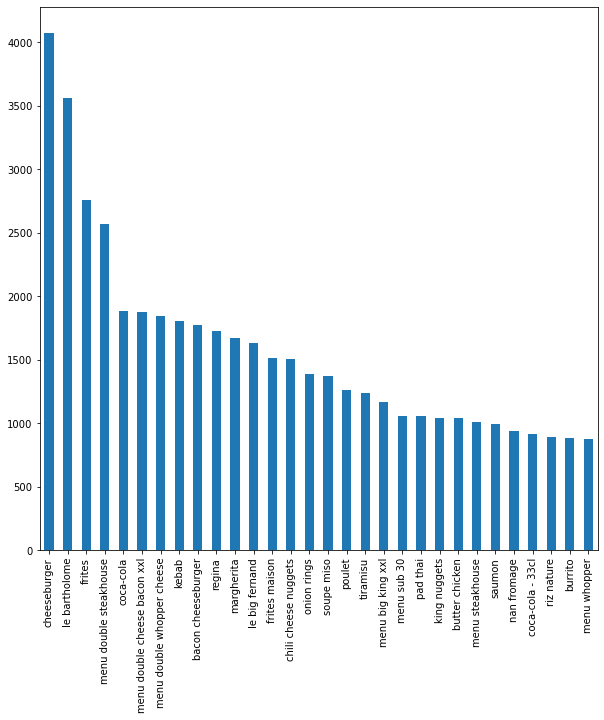

In [199]:
plt.figure(figsize=(10,10))
products[products['merchant_name']=='deliveroo']['product_name'].value_counts().head(30).plot(kind='bar')

In [203]:
products[products['merchant_name']=='deliveroo']['product_name'].value_counts().reset_index().head(30)

,index,product_name
0,cheeseburger,4075
1,le bartholome,3564
2,frites,2756
3,menu double steakhouse,2566
4,coca-cola,1887
5,menu double cheese bacon xxl,1879
6,menu double whopper cheese,1849
7,kebab,1804
8,bacon cheeseburger,1774
9,regina,1728


In [6]:
# contenu des 100 premières commandes
[ list(products[products['id_order']==o]['product_name']) for o in tqdm(products['id_order'].unique()[:100])]

100%|██████████| 100/100 [00:08<00:00, 12.12it/s]


[['toast goody woody'],
 ['soupe miso', 'salmon lovers', 'super mix', 'salade de choux'],
 ['3. raviolis grilles au porc, chou blanc, champignon',
  '1. raviolis grilles au porc, ciboulette, crevette',
  '2. raviolis grilles au porc, courgette, crevette',
  "13. soupe vegetarienne d'algues",
  '9. raviolis grilles au poulet, chou blanc, champignon'],
 ['quattro formaggi'],
 ['butter chicken', 'riz basmati safran', 'cheese nan'],
 ['nouilles au porc hache sans soupe',
  'lait de soja',
  'ravioli au porc avec soupe pimentee',
  'ravioli a la sauce sichuanaise'],
 ['wok a composer', 'wok a composer'],
 ['e12- gyoza',
  's02- shake',
  'it02- ebi yakisoba',
  'm09- california',
  's02- shake'],
 ['rouleaux de printemps', 'ketew cha crevettes', 'orangina 33 cl'],
 ['venitienne', "schweppes agrum'"],
 ['nan fromage', 'butter chicken', 'butter chicken'],
 ['big formule : le bartholome'],
 ['fusilli al tartufo',
  'batonnets de mozzarella',
  'frites maison a la truffe'],
 ['nan, entree, plat

In [177]:
products['date'].value_counts()

2020-06-05    4723
2020-05-29    4663
2020-06-12    4599
2020-06-14    4546
2020-05-16    4397
              ... 
2017-05-27     252
2017-01-04     248
2017-01-03     220
2017-12-25     218
2017-12-24     181
Name: date, Length: 1277, dtype: int64

In [179]:
prod_stats=products.groupby(['date','merchant_name'], as_index=False).count()

In [40]:
len(products.product_name.unique())

160428

## all products frequency

In [222]:
all_products = products.product_name.value_counts()
all_products

big mac                           30713
cheeseburger                      18425
4 chicken mcnuggets               15301
croque mcdo                       15263
9 chicken mcnuggets               14331
                                  ...  
e7 ravioli au crevette frite          1
burger big tasty                      1
mega vega                             1
e8 tartare de saumon et avocat        1
menu maxi double cheese burger        1
Name: product_name, Length: 160427, dtype: int64

In [58]:
(all_products<20).sum() / len(all_products)

0.9439495845462422

In [60]:
all_products[all_products<20].sum() / all_products.sum()

0.26823152893862867

In [62]:
len(all_products) *0.05

8021.35

In [66]:
all_products[all_products>100]

big mac                                   30713
cheeseburger                              18425
4 chicken mcnuggets                       15301
croque mcdo                               15263
9 chicken mcnuggets                       14331
                                          ...  
poutine a composer                          101
croissant au beurre                         101
beignet chocolat                            101
mcwrap chicken tortilla chips & mexico      101
burger + side + boisson                     101
Name: product_name, Length: 1713, dtype: int64

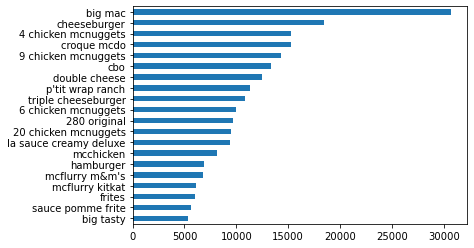

In [88]:
all_products[:20][::-1].plot(kind='barh')
plt.show()

In [224]:
all_products_100 = all_products[all_products>100]

In [78]:
len(all_products_100)

1713

In [225]:
all_products_split_index =[]
all_products_split_frequency =[]
for i,p in tqdm(enumerate(all_products_100)):
    c = all_products_100.index[i].split()
    for j in range(len(c)):
        if c[j] in all_products_split_index:
            all_products_split_frequency[all_products_split_index.index(c[j])]+=p
        else:
            all_products_split_index.append(c[j])
            all_products_split_frequency.append(p)
#print(all_products_split_index)
#print(all_products_split_frequency)

1713it [00:00, 58743.37it/s]


In [226]:
len(all_products_split_index)

1119

In [232]:
all_products_split = pd.Series(data=all_products_split_frequency, index=all_products_split_index)

In [233]:
all_products_split.sort_values(ascending=False)

menu         100455
chicken       69958
big           55855
cheese        52571
mcnuggets     49211
              ...  
mexico          101
goi             101
cuon            101
twin            101
patate          101
Length: 1119, dtype: int64

In [234]:
all_products.to_csv('all_products.csv')

In [237]:
all_prod_r = all_products.reset_index().set_index('product_name')
all_prod_r

,index
product_name,
30713,big mac
18425,cheeseburger
15301,4 chicken mcnuggets
15263,croque mcdo
14331,9 chicken mcnuggets
...,...
1,e7 ravioli au crevette frite
1,burger big tasty
1,mega vega


In [238]:
all_prod_r.to_csv('all_products.csv')

In [88]:
all_products_split[all_products_split>5000]

big             55855
mac             33648
cheeseburger    38967
4               20998
chicken         69958
                ...  
wings            6486
salade           8550
signature        5755
composer         7825
boisson          5473
Length: 102, dtype: int64

In [91]:
all_products_split[all_products_split>5000].index

Index(['big', 'mac', 'cheeseburger', '4', 'chicken', 'mcnuggets', 'croque',
       'mcdo', '9', 'cbo',
       ...
       'maxi', '1', 'bowl', '+', 'hot', 'wings', 'salade', 'signature',
       'composer', 'boisson'],
      dtype='object', length=102)

In [230]:
all_products_list = [ (all_products_split.index[i]+' ')*all_products_split[i]  for i,
                     f in enumerate(all_products_split)]

In [ ]:
all_products_list

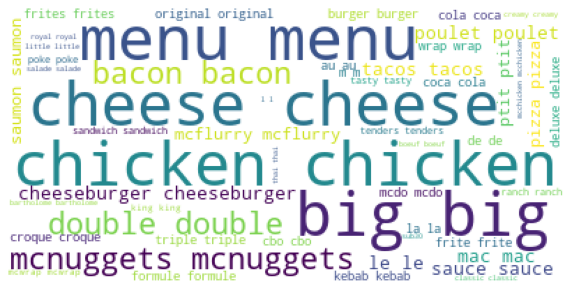

In [86]:
wordcloud(all_products_list)

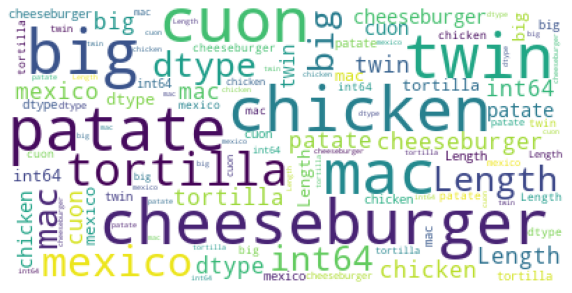

In [242]:
wordcloud(all_products_split)

In [52]:
plt.show()

In [90]:
orders = products.id_order.unique()
orders

array(['AVkmcB3KFSf772cTh6V2M9yGwuQ=', 'CQeMFF72l4u80Ae4mnVLhnTzqx0=',
       'CST/Ypsjj5CZbsx41fX35TIlSSA=', ...,
       '/7xBQ0v3sf7rNfCQfhezNVgKLgM=', '/8gXFRj4oFFrwX6tiZMmKmPePqs=',
       '//FH2PpgKmXmDNP1vRO4E3a3y0Y='], dtype=object)

In [91]:
len(orders)

807731

In [93]:
len(transactions)

807676

## orders over time plot by merchants

In [77]:
prod_stats=products.groupby(['date','merchant_name'], as_index=False).count()

In [180]:
prod_stats

,date,merchant_name,id_order,product_name,product_description
0,2017-01-01,deliveroo,202,201,98
1,2017-01-01,just eat,3,0,0
2,2017-01-01,uber eats,105,105,27
3,2017-01-02,deliveroo,210,210,110
4,2017-01-02,just eat,5,0,0
...,...,...,...,...,...
3824,2020-06-29,just eat,123,0,0
3825,2020-06-29,uber eats,2361,2360,929
3826,2020-06-30,deliveroo,845,845,310
3827,2020-06-30,just eat,74,0,0


In [79]:
orders_by_month = prod_stats[['date','merchant_name','id_order']]

In [80]:
orders_by_month.date=pd.to_datetime(orders_by_month['date']).dt.to_period('W').dt.to_timestamp()

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [81]:
orders_by_month2 = orders_by_month.groupby(['date','merchant_name'],as_index=False).sum()

<AxesSubplot:xlabel='date', ylabel='id_order'>

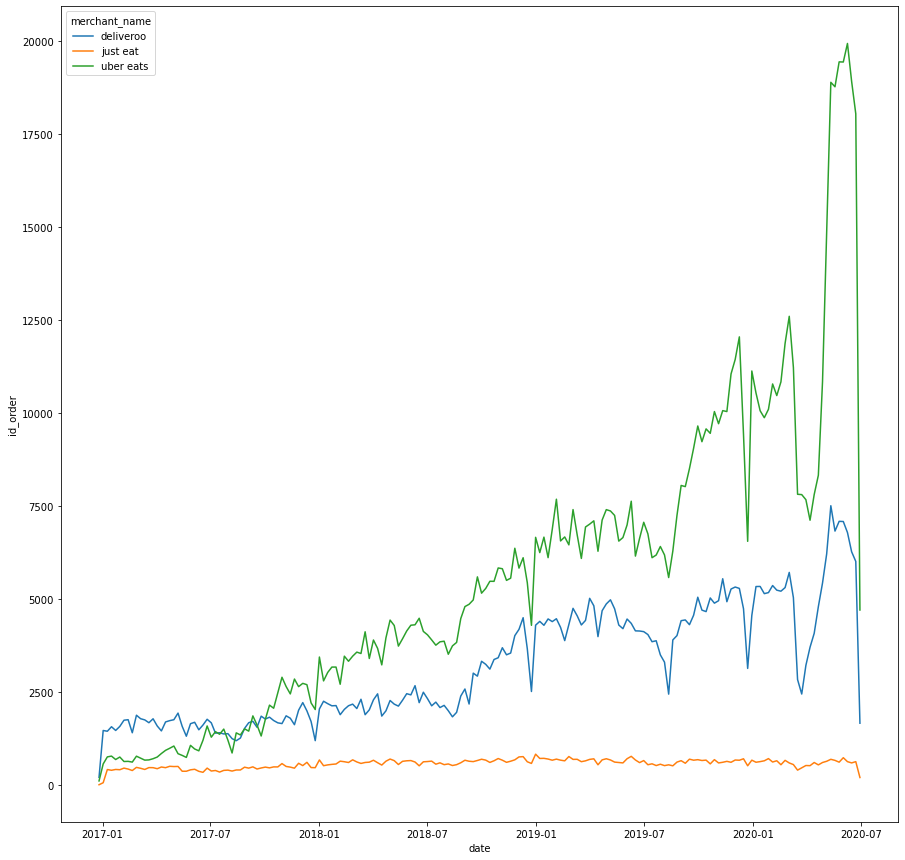

In [85]:
plt.figure(figsize=(15,15))
sns.lineplot(data=orders_by_month2, x='date', y='id_order', hue='merchant_name')

<AxesSubplot:xlabel='date', ylabel='id_order'>

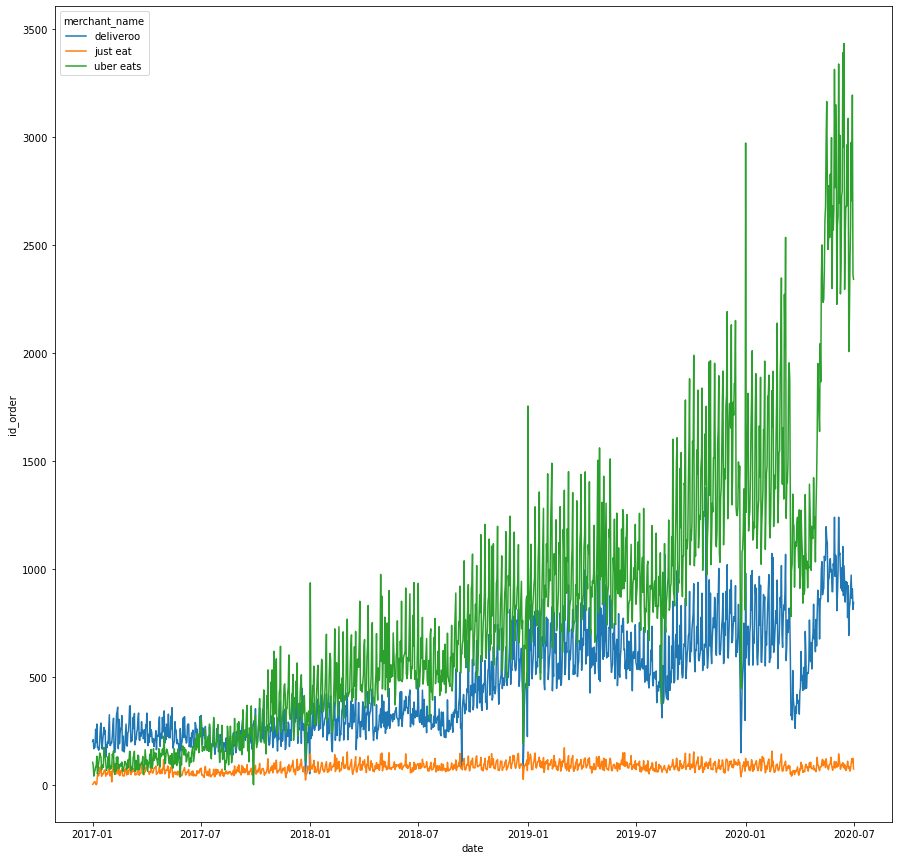

In [187]:
plt.figure(figsize=(15,15))
sns.lineplot(data=prod_stats, x='date', y='id_order', hue='merchant_name')

# Transactions exploration

## loading & cleaning

In [14]:
transactions=pd.read_csv('20210128174739_databird-synthesized-transactions-extract.csv')

In [116]:
transactions.order_date = pd.to_datetime(transactions.order_date)

In [63]:
transactions.head()

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,...,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
0,1,2.0,Gen. Y - [1980-1994],NaN,deliveroo,2020-01-15,12:00:00,10.3,eur,NaN,...,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1
1,2,1.0,Gen. Z - [1995-2010],NaN,uber eats,2019-01-24,19:00:00,7.6,eur,payment card - visa,...,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1
2,3,1.0,Gen. Z - [1995-2010],NaN,uber eats,2020-02-05,12:00:00,10.6,eur,paypal,...,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0
3,4,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-01-11,21:00:00,0.0,eur,NaN,...,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0
4,5,NaN,Gen. Z - [1995-2010],NaN,deliveroo,2019-12-15,20:00:00,25.3,eur,NaN,...,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1


In [64]:
transactions.tail()

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,...,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
807671,807672,2.0,Gen. Z - [1995-2010],NaN,just eat,2019-04-10,20:00:00,0.6,eur,NaN,...,NaN,0.0,NaN,NaN,provence alpes cote d azur,bouches du rhone,marseille,0,1,0
807672,807673,2.0,Gen. Z - [1995-2010],NaN,uber eats,2020-06-01,18:00:00,16.3,eur,paypal,...,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0
807673,807674,1.0,NaN,NaN,uber eats,2018-12-02,19:00:00,15.9,eur,paypal,...,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0
807674,807675,2.0,Gen. Z - [1995-2010],NaN,uber eats,2020-03-14,17:00:00,30.0,eur,payment card - visa,...,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0
807675,807676,2.0,NaN,NaN,uber eats,2020-05-28,20:00:00,77.1,eur,payment card - visa,...,3.5,0.0,yamazaki,asian - japanese - sushi,ile de france,val d oise,pontoise,1,0,0


In [65]:
transactions.info()

  0%|          | 0/807676 [9:42:33<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807676 entries, 0 to 807675
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   row_nb                                 807676 non-null  int64  
 1   synthetic_gender                       777290 non-null  float64
 2   synthetic_age_generation               757776 non-null  object 
 3   is_loyalty_deliveroo                   29245 non-null   float64
 4   merchant_name                          807676 non-null  object 
 5   order_date                             807676 non-null  object 
 6   order_time                             807676 non-null  object 
 7   order_total_paid                       777469 non-null  float64
 8   order_currency                         807676 non-null  object 
 9   payment_method_name                    442379 non-null  object 
 10  order_delivery_fee                     807477 non-null  

<AxesSubplot:>

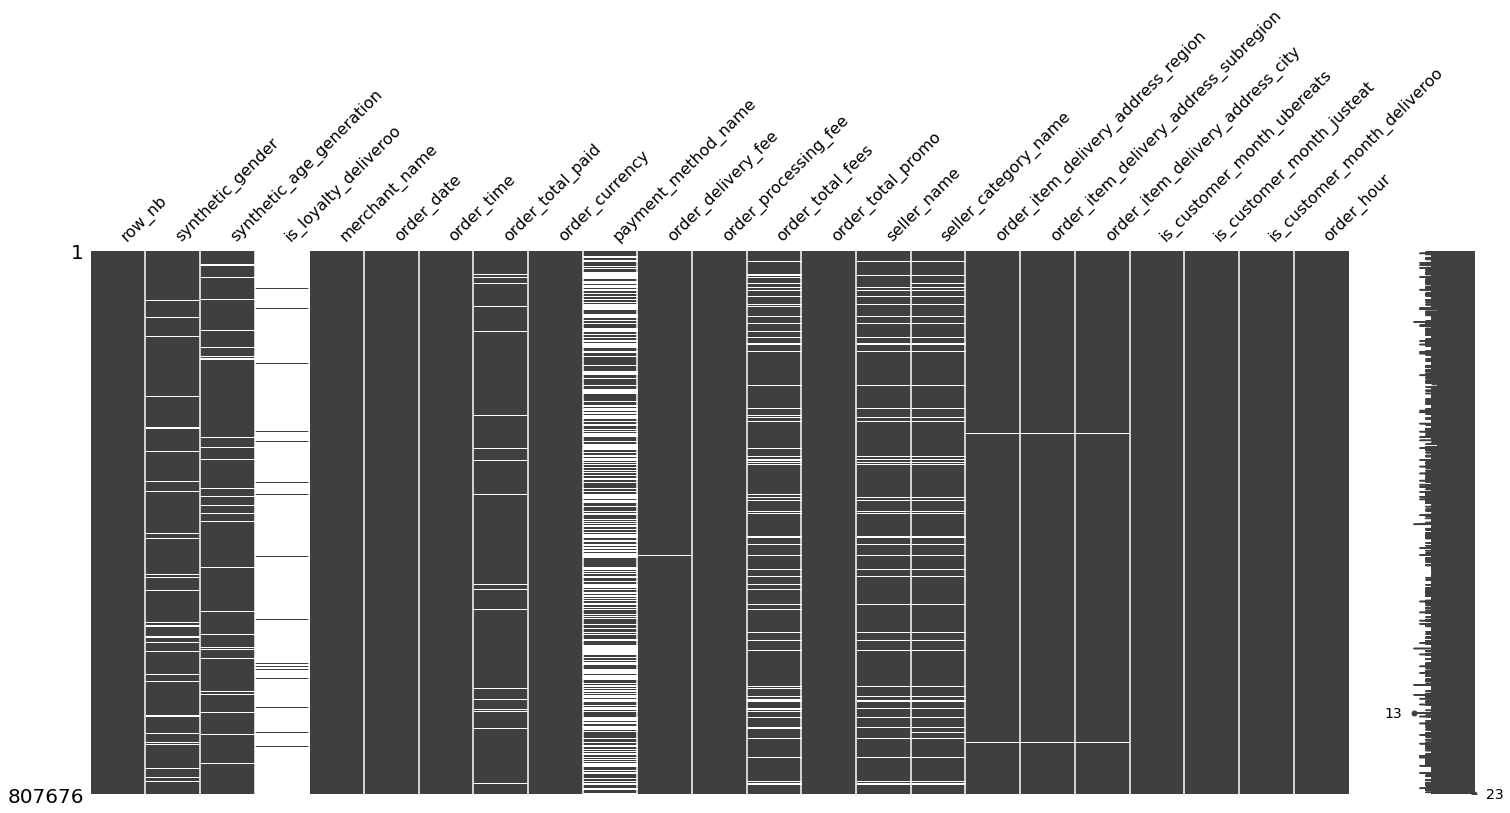

In [231]:
msno.matrix(transactions)

In [36]:
transactions.nunique()

row_nb                                   807676
synthetic_gender                              2
synthetic_age_generation                      5
is_loyalty_deliveroo                          2
merchant_name                                 3
order_date                                 1277
order_time                                   24
order_total_paid                           1518
payment_method_name                          58
order_delivery_fee                           73
order_processing_fee                        104
order_total_fees                            431
order_total_promo                           454
seller_name                               24481
seller_category_name                         31
order_item_delivery_address_region           17
order_item_delivery_address_subregion        97
order_item_delivery_address_city           1455
is_customer_month_ubereats                    2
is_customer_month_justeat                     2
is_customer_month_deliveroo             

In [ ]:
tr_unique = transactions.nunique().reset_index()

In [23]:
tr_unique.columns=['index', 'frequence']

In [25]:
tr_unique = tr_unique.sort_values('frequence')

In [27]:
tr_unique[tr_unique.frequence <=3]

,index,frequence
8,order_currency,1
21,is_customer_month_deliveroo,2
1,synthetic_gender,2
3,is_loyalty_deliveroo,2
19,is_customer_month_ubereats,2
20,is_customer_month_justeat,2
4,merchant_name,3


In [28]:
transactions['order_currency'].unique()

array(['eur'], dtype=object)

In [29]:
# suppression de la colonne order_currency... toutes les transactions sont en eur
transactions.drop('order_currency', axis=1, inplace=True)

In [31]:
ls = list(tr_unique[tr_unique.frequence ==2]['index'])

In [32]:
[ (l, transactions[l].unique()) for l in ls]

[('is_customer_month_deliveroo', array([1, 0])),
 ('synthetic_gender', array([ 2.,  1., nan])),
 ('is_loyalty_deliveroo', array([nan,  0.,  1.])),
 ('is_customer_month_ubereats', array([0, 1])),
 ('is_customer_month_justeat', array([0, 1]))]

In [66]:
# transformation en boolean des colonnes qui n'ont que 2 valeurs
transactions['is_customer_month_deliveroo']=transactions['is_customer_month_deliveroo']==1
transactions['is_customer_month_ubereats']=transactions['is_customer_month_ubereats']==1
transactions['is_customer_month_justeat']=transactions['is_customer_month_justeat']==1

In [67]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807676 entries, 0 to 807675
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   row_nb                                 807676 non-null  int64  
 1   synthetic_gender                       777290 non-null  float64
 2   synthetic_age_generation               757776 non-null  object 
 3   is_loyalty_deliveroo                   29245 non-null   float64
 4   merchant_name                          807676 non-null  object 
 5   order_date                             807676 non-null  object 
 6   order_time                             807676 non-null  object 
 7   order_total_paid                       777469 non-null  float64
 8   order_currency                         807676 non-null  object 
 9   payment_method_name                    442379 non-null  object 
 10  order_delivery_fee                     807477 non-null  

In [72]:
pd.Series(transactions['order_time'].unique()).sort_values()

14    00:00:00
16    01:00:00
8     02:00:00
15    03:00:00
21    04:00:00
18    05:00:00
23    06:00:00
19    07:00:00
22    08:00:00
20    09:00:00
12    10:00:00
17    11:00:00
0     12:00:00
6     13:00:00
10    14:00:00
7     15:00:00
9     16:00:00
11    17:00:00
5     18:00:00
1     19:00:00
3     20:00:00
2     21:00:00
4     22:00:00
13    23:00:00
dtype: object

In [74]:
int(transactions['order_time'][0][:2])

12

In [76]:
transactions['order_time']

0         12:00:00
1         19:00:00
2         12:00:00
3         21:00:00
4         20:00:00
            ...   
807671    20:00:00
807672    18:00:00
807673    19:00:00
807674    17:00:00
807675    20:00:00
Name: order_time, Length: 807676, dtype: object

In [4]:
# recupération heure commande sous forme d'entier
transactions['order_hour']=[ int(transactions['order_time'][i][:2]) for i in range(len(transactions['order_time']))]

In [5]:
# conversion date commande en datetime 
transactions['order_date']=pd.to_datetime(transactions['order_date'])

In [80]:
pd.to_datetime(transactions['order_time'])

0        2021-07-18 12:00:00
1        2021-07-18 19:00:00
2        2021-07-18 12:00:00
3        2021-07-18 21:00:00
4        2021-07-18 20:00:00
                 ...        
807671   2021-07-18 20:00:00
807672   2021-07-18 18:00:00
807673   2021-07-18 19:00:00
807674   2021-07-18 17:00:00
807675   2021-07-18 20:00:00
Name: order_time, Length: 807676, dtype: datetime64[ns]

In [81]:
i=0
str(transactions.order_date[i]).replace(' 00:00:00',' ')+transactions.order_time[i]

'2020-01-15 12:00:00'

In [82]:
# pour convertir l'heure de commande en datetime

# transactions.order_time = [ pd.to_datetime(str(transactions.order_date[i]).replace(' 00:00:00',' ')+transactions.order_time[i]) \
# for i in tqdm(range(len(transactions['order_date'])))]

In [60]:
transactions.order_time

0        2020-01-15 12:00:00
1        2019-01-24 19:00:00
2        2020-02-05 12:00:00
3        2019-01-11 21:00:00
4        2019-12-15 20:00:00
                 ...        
807671   2019-04-10 20:00:00
807672   2020-06-01 18:00:00
807673   2018-12-02 19:00:00
807674   2020-03-14 17:00:00
807675   2020-05-28 20:00:00
Name: order_time, Length: 807676, dtype: datetime64[ns]

In [83]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807676 entries, 0 to 807675
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   row_nb                                 807676 non-null  int64         
 1   synthetic_gender                       777290 non-null  float64       
 2   synthetic_age_generation               757776 non-null  object        
 3   is_loyalty_deliveroo                   29245 non-null   float64       
 4   merchant_name                          807676 non-null  object        
 5   order_date                             807676 non-null  datetime64[ns]
 6   order_time                             807676 non-null  object        
 7   order_total_paid                       777469 non-null  float64       
 8   order_currency                         807676 non-null  object        
 9   payment_method_name                    442379 no

In [85]:
transactions.sample(5)

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,...,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,order_hour
55211,55212,1.0,Gen. Y - [1980-1994],NaN,uber eats,2018-09-28,20:00:00,22.2,eur,paypal,...,0.0,mcdonald's,north american - burger,auvergne rhone alpes,rhone,villeurbanne,True,True,False,20
344101,344102,1.0,Gen. Z - [1995-2010],NaN,uber eats,2019-03-14,20:00:00,16.6,eur,payment card - visa,...,0.0,nbk,middle eastern - kebab,bretagne,ille et vilaine,rennes,True,False,False,20
793843,793844,1.0,Gen. Y - [1980-1994],0.0,deliveroo,2018-07-19,13:00:00,10.1,eur,NaN,...,0.0,bagel story,north american - sandwich,provence alpes cote d azur,bouches du rhone,aix en provence,False,False,True,13
611244,611245,2.0,Gen. Y - [1980-1994],NaN,uber eats,2019-07-17,22:00:00,21.6,eur,paypal,...,10.0,rajpoot,asian - indian,ile de france,val de marne,maisons alfort,True,True,False,22
693528,693529,1.0,NaN,NaN,deliveroo,2020-06-02,17:00:00,23.8,eur,NaN,...,0.0,five guys,north american - burger,ile de france,paris,paris,False,False,True,17


In [173]:
transactions['year_month']=transactions.order_date.dt.to_period('M').dt.to_timestamp()
transactions['year_month']

0        2020-01-01
1        2019-01-01
2        2020-02-01
3        2019-01-01
4        2019-12-01
            ...    
807671   2019-04-01
807672   2020-06-01
807673   2018-12-01
807674   2020-03-01
807675   2020-05-01
Name: year_month, Length: 807676, dtype: datetime64[ns]

In [174]:
transactions.groupby(['year_month','merchant_name']).count()['row_nb']

year_month  merchant_name
2017-01-01  deliveroo         2502
            just eat          1364
            uber eats         1245
2017-02-01  deliveroo         2484
            just eat          1679
                             ...  
2020-05-01  just eat          2841
            uber eats        29674
2020-06-01  deliveroo        11837
            just eat          2767
            uber eats        32268
Name: row_nb, Length: 126, dtype: int64

## customer gender pie chart

In [89]:
gender_cust = transactions.synthetic_gender.value_counts(dropna=False, normalize=True).reset_index()

In [92]:
list(gender_cust['index'])

[1.0, 2.0, nan]

In [94]:
gender_cust['index']=['Male', 'Female', np.nan]

In [109]:
gender_cust.set_index('index', inplace=True)

In [110]:
gender_cust

,synthetic_gender
index,
Male,0.679669
Female,0.282710
NaN,0.037622


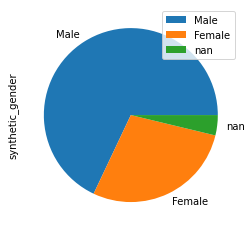

In [119]:
gender_cust.plot.pie( y='synthetic_gender'); #807676 rows

## customer generation pie chart

In [216]:
gen_cust = transactions.synthetic_age_generation.value_counts(dropna=False, normalize=True)

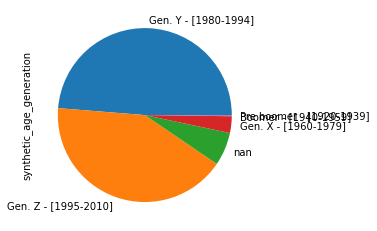

In [217]:
gen_cust.plot.pie();

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


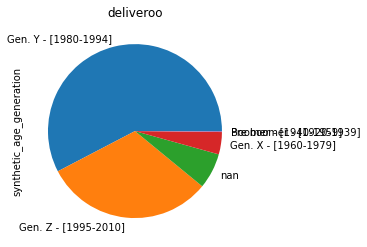

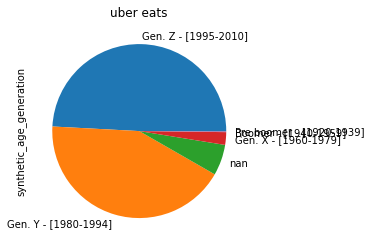

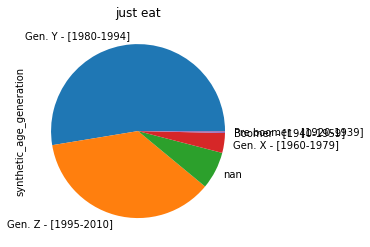

In [215]:
for m in merchants:
    gen_cust = transactions[transactions.merchant_name==m].synthetic_age_generation.\
        value_counts(dropna=False, normalize=True)
    plt.title(m)
    gen_cust.plot.pie()
    plt.show()

## merchants orders pie chart

In [121]:
transactions.merchant_name.value_counts()

uber eats    442797
deliveroo    260964
just eat     103915
Name: merchant_name, dtype: int64

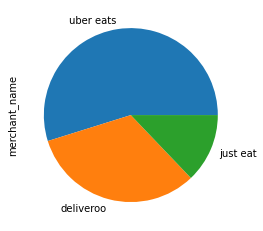

In [125]:
transactions.merchant_name.value_counts().plot.pie();

In [210]:
merchants = transactions.merchant_name.unique()
merchants

array(['deliveroo', 'uber eats', 'just eat'], dtype=object)

## is_customer_month fields

In [123]:
transactions[transactions['merchant_name']=='deliveroo'].is_customer_month_ubereats.sum()

60660

In [134]:
pd.DataFrame(data=[ [ transactions[transactions['merchant_name']==m].is_customer_month_deliveroo.sum(),
    transactions[transactions['merchant_name']==m].is_customer_month_ubereats.sum(),
    transactions[transactions['merchant_name']==m].is_customer_month_justeat.sum() ] for m in merchants ],
    index=merchants, columns=merchants)  

,deliveroo,uber eats,just eat
deliveroo,260964,60660,11145
uber eats,64027,442797,25206
just eat,8490,16423,103915


In [135]:
transactions.columns

Index(['row_nb', 'synthetic_gender', 'synthetic_age_generation',
       'is_loyalty_deliveroo', 'merchant_name', 'order_date', 'order_time',
       'order_total_paid', 'order_currency', 'payment_method_name',
       'order_delivery_fee', 'order_processing_fee', 'order_total_fees',
       'order_total_promo', 'seller_name', 'seller_category_name',
       'order_item_delivery_address_region',
       'order_item_delivery_address_subregion',
       'order_item_delivery_address_city', 'is_customer_month_ubereats',
       'is_customer_month_justeat', 'is_customer_month_deliveroo',
       'order_hour'],
      dtype='object')

## order number over date

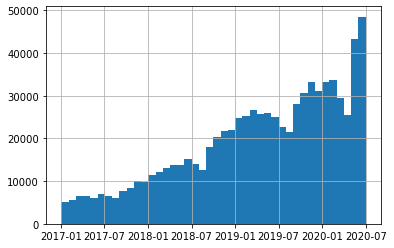

In [144]:
# evolution nb commande au cours de la periode
transactions.order_date.hist(bins=42);

### orders over days of the week

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


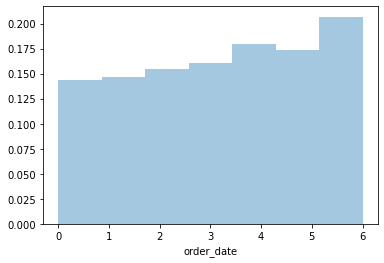

In [164]:
# distribution en fct du jour de la semaine
# The day of the week with Monday=0, Sunday=6.
sns.distplot(transactions.order_date.dt.dayofweek, bins=7, kde=False,
             norm_hist=True);

### orders over month

In [273]:
transactions.order_date.min(), transactions.order_date.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2020-06-30 00:00:00'))

In [279]:
transactions.order_date > '2017-06-30'

0         True
1         True
2         True
3         True
4         True
          ... 
807671    True
807672    True
807673    True
807674    True
807675    True
Name: order_date, Length: 807676, dtype: bool

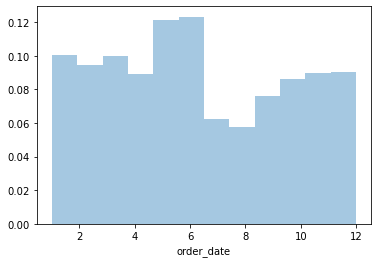

In [280]:
# distribution en fct du mois
sns.distplot(transactions[transactions.order_date > '2017-06-30'].order_date.dt.month, bins=12, kde=False,
             norm_hist=True);

## order distribution over day time 

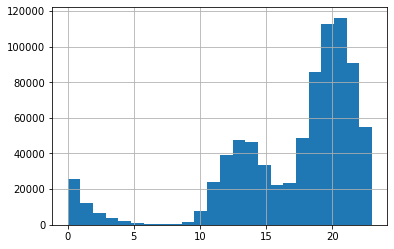

In [140]:
transactions.order_hour.hist(bins=24);

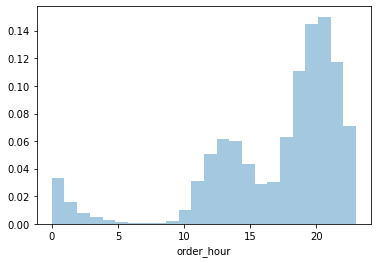

In [250]:
sns.distplot(transactions.order_hour, bins=24, kde=False, norm_hist=True);

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


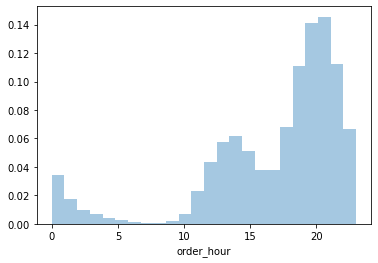

In [255]:
# distribution le week-end
sns.distplot(transactions[(transactions.order_date.dt.dayofweek == 5) | \
                          (transactions.order_date.dt.dayofweek == 6)].order_hour, bins=24, 
             kde=False, norm_hist=True);

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


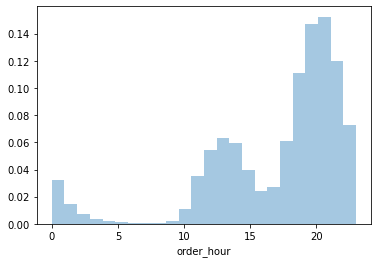

In [264]:
# distribution la semaine
sns.distplot(transactions[(transactions.order_date.dt.dayofweek != 5) & \
                          (transactions.order_date.dt.dayofweek != 6)].order_hour, bins=24, 
             kde=False, norm_hist=True);

## numeric columns stats

### average basket/fees

In [11]:
## remplace les nan de is_loyalty_deliveroo pour avoir des pourcentages sur le total des transactions
transactions.is_loyalty_deliveroo.fillna(value=0, inplace=True)

In [12]:
transactions.is_loyalty_deliveroo.isna().sum()

0

In [15]:
transactions[transactions.merchant_name!='just eat'].order_total_paid.isna().sum()

0

In [42]:
transactions[transactions.merchant_name!='just eat'].describe()['order_total_paid']

count    703761.000000
mean         23.486261
std          12.803976
min           0.000000
25%          15.100000
50%          20.200000
75%          29.100000
max         943.600000
Name: order_total_paid, dtype: float64

1.1% des utilisateurs ont une carte de fidélité deliveroo <br>
panier moyen 23,49 € <br>
delivery fee moyen 2,27 € <br>
processing fee moyen 0,18 € <br>
total fee moyen 3,6 € <br>
promo moyen 0,77 € <br>

In [35]:
[ transactions.is_loyalty_deliveroo.mean(), transactions[transactions.merchant_name!='just eat'].order_total_paid.mean(), 
transactions.order_delivery_fee.mean(), transactions.order_processing_fee.mean(),
transactions.order_total_fees.mean(), transactions.order_total_promo.mean()]

[0.3055906992648316,
 23.486260960751558,
 2.2678970422664593,
 0.17765824414738934,
 3.608041934690912,
 0.778346143750734]

In [285]:
merchants

array(['deliveroo', 'uber eats', 'just eat'], dtype=object)

In [211]:
merchants_stats = pd.DataFrame(data= [ [round(transactions[transactions.merchant_name == m].is_loyalty_deliveroo.mean(),3),
                  round(transactions[transactions.merchant_name == m].order_total_paid.mean(),2),
                  round(transactions[transactions.merchant_name == m].order_delivery_fee.mean(),2),
                  round(transactions[transactions.merchant_name == m].order_processing_fee.mean(),2),
                  round(transactions[transactions.merchant_name == m].order_total_fees.mean(),2),
                  round(transactions[transactions.merchant_name == m].order_total_promo.mean(),2) ] for m in merchants],
                    index=list(merchants), columns=['perc_deliveroo_loyalty','avg_order','avg_deliv_fee','avg_process_fee',
                             'avg_total_fee','avg_promo'])

In [298]:
merchants_stats

,perc_deliveroo_loyalty,avg_order,avg_deliv_fee,avg_process_fee,avg_total_fee,avg_promo
deliveroo,0.420,24.35,2.24,0.01,2.26,0.78
uber eats,0.158,22.98,2.81,0.32,4.40,0.96
just eat,0.083,0.25,0.00,0.00,NaN,0.00


In [302]:
transactions[transactions.merchant_name == 'just eat'].order_total_paid.describe()

count    73708.000000
mean         0.249640
std          0.323887
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: order_total_paid, dtype: float64

=> on ne peut pas utiliser les transactions de just eat... les montants des commandes sont faux

In [43]:
transactions.select_dtypes('number').fillna(0).corr()

,row_nb,synthetic_gender,is_loyalty_deliveroo,order_total_paid,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,order_hour
row_nb,1.000000,-0.001012,-0.000285,-0.002233,0.000946,-0.000838,0.000244,-0.000646,0.001283,-0.000315,-0.001658,-0.001839
synthetic_gender,-0.001012,1.000000,0.000270,0.046792,0.012504,-0.009499,-0.018748,0.008497,-0.048241,-0.044311,0.054531,0.021311
is_loyalty_deliveroo,-0.000285,0.000270,1.000000,-0.010604,-0.126196,-0.011605,-0.085853,-0.000907,-0.050108,-0.031902,0.108610,-0.007976
order_total_paid,-0.002233,0.046792,-0.010604,1.000000,0.415666,0.166240,0.392078,-0.029656,0.165938,-0.456074,0.175980,0.054472
order_delivery_fee,0.000946,0.012504,-0.126196,0.415666,1.000000,-0.105266,0.578403,0.040093,0.370777,-0.518070,0.017924,-0.030354
order_processing_fee,-0.000838,-0.009499,-0.011605,0.166240,-0.105266,1.000000,0.246145,0.175597,0.203265,-0.103579,-0.151681,0.008948
order_total_fees,0.000244,-0.018748,-0.085853,0.392078,0.578403,0.246145,1.000000,0.084492,0.426493,-0.362814,-0.165940,-0.015719
order_total_promo,-0.000646,0.008497,-0.000907,-0.029656,0.040093,0.175597,0.084492,1.000000,0.066666,-0.097695,-0.009063,0.021741
is_customer_month_ubereats,0.001283,-0.048241,-0.050108,0.165938,0.370777,0.203265,0.426493,0.066666,1.000000,-0.310061,-0.459302,-0.060346
is_customer_month_justeat,-0.000315,-0.044311,-0.031902,-0.456074,-0.518070,-0.103579,-0.362814,-0.097695,-0.310061,1.000000,-0.225104,0.025848


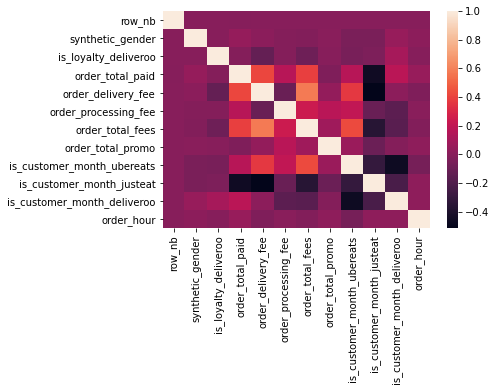

In [12]:
sns.heatmap(transactions.select_dtypes('number').fillna(0).corr());

### basket/fees/promo box plots

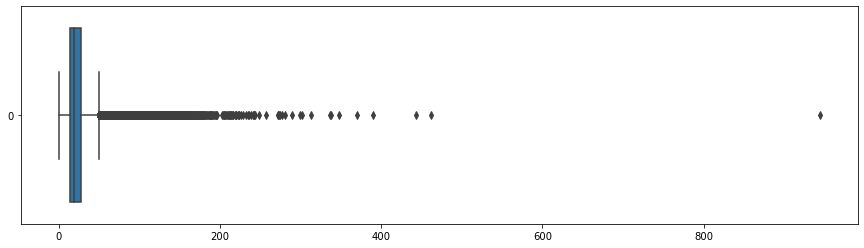

In [36]:
plt.figure(figsize=(15,4))
sns.boxplot(data=transactions['order_total_paid'], orient='h');

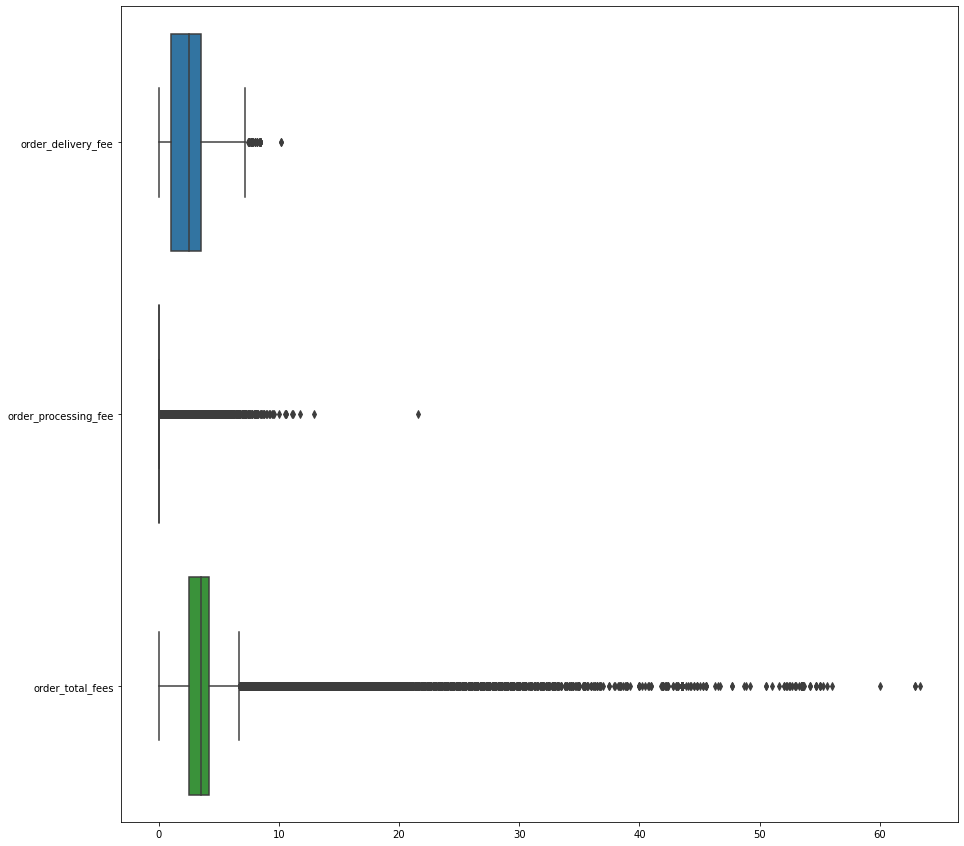

In [42]:
plt.figure(figsize=(15,15))
sns.boxplot(data=transactions[['order_delivery_fee', 'order_processing_fee', 'order_total_fees']], orient='h');

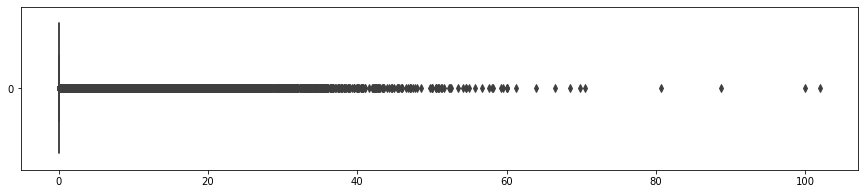

In [38]:
plt.figure(figsize=(15,3))
sns.boxplot(data=transactions['order_total_promo'], orient='h');

### average baskets over dayweek

In [7]:
# The day of the week with Monday=0, Sunday=6.
transactions['dayweek']=transactions.order_date.dt.dayofweek

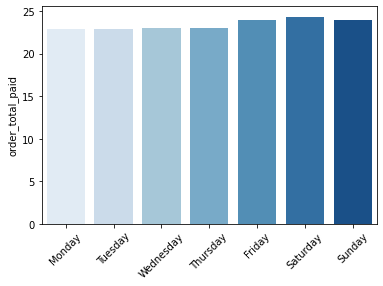

In [56]:
plt.xticks(rotation=45)
sns.barplot(data=transactions[transactions.merchant_name!='just eat'].groupby('dayweek').\
            mean()['order_total_paid'].reset_index(), x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                         'Saturday', 'Sunday'], y='order_total_paid',
            palette='Blues');
      

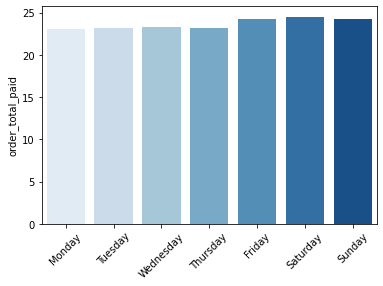

In [61]:
# average basket Paris
plt.xticks(rotation=45)
sns.barplot(data=transactions[(transactions.merchant_name!='just eat') & \
                             (transactions.order_item_delivery_address_city=='paris')].groupby('dayweek').\
            mean()['order_total_paid'].reset_index(), x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                         'Saturday', 'Sunday'], y='order_total_paid',
            palette='Blues');

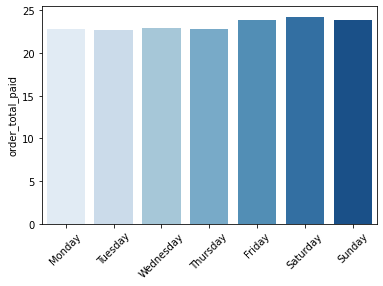

In [62]:
# average basket excluding Paris
plt.xticks(rotation=45)
sns.barplot(data=transactions[(transactions.merchant_name!='just eat') & \
                             (transactions.order_item_delivery_address_city!='paris')].groupby('dayweek').\
            mean()['order_total_paid'].reset_index(), x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                         'Saturday', 'Sunday'], y='order_total_paid',
            palette='Blues');

### average baskets over month

In [16]:
transactions['month']=transactions.order_date.dt.month

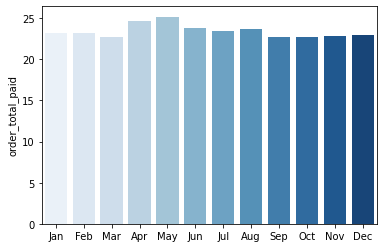

In [55]:
sns.barplot(data=transactions[transactions.merchant_name!='just eat'].groupby('month').\
            mean()['order_total_paid'].reset_index(), x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            y='order_total_paid', palette='Blues');

### average basket month over month

In [74]:
transactions['year_month']=transactions.order_date.dt.to_period('M') #.dt.to_timestamp()

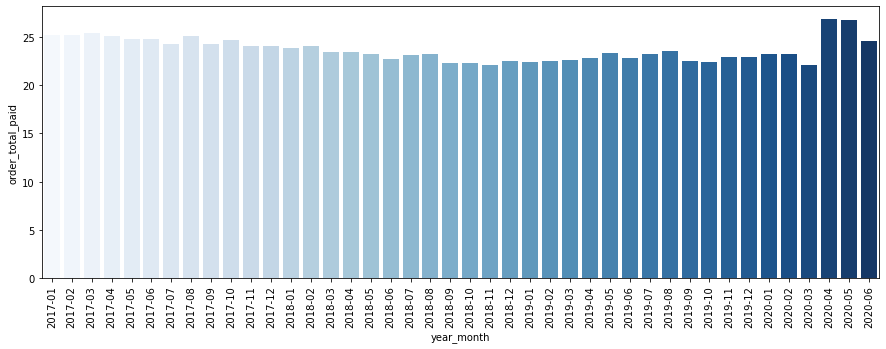

In [79]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=transactions[transactions.merchant_name!='just eat'].groupby('year_month').\
            mean()['order_total_paid'].reset_index(), x='year_month',
            y='order_total_paid', palette='Blues');

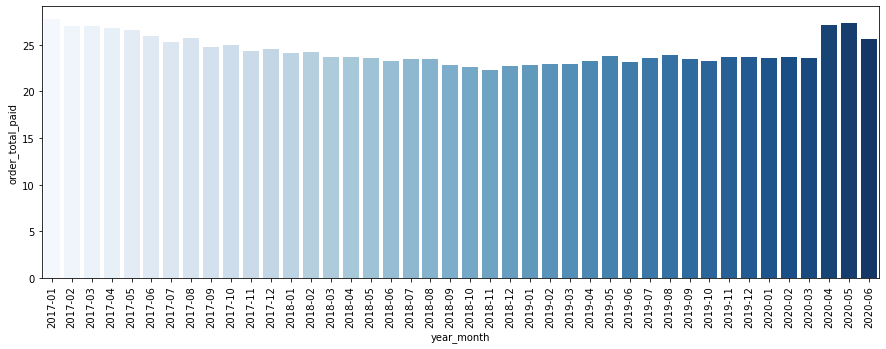

In [81]:
# excluding promo codes
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=transactions[(transactions.merchant_name!='just eat') & \
                             (transactions.order_total_promo==0)].groupby('year_month').\
            mean()['order_total_paid'].reset_index(), x='year_month',
            y='order_total_paid', palette='Blues');

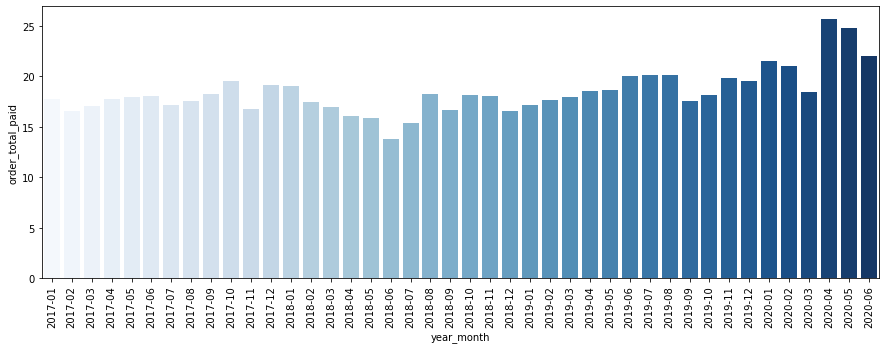

In [82]:
# with promo codes
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=transactions[(transactions.merchant_name!='just eat') & \
                             (transactions.order_total_promo!=0)].groupby('year_month').\
            mean()['order_total_paid'].reset_index(), x='year_month',
            y='order_total_paid', palette='Blues');

## order_total_promo

In [125]:
import datetime

In [168]:
promo = pd.DataFrame(data=transactions[['order_date','order_total_promo']] )   

In [171]:
promo['order_date']=promo['order_date'].dt.to_period('M').dt.to_timestamp()

<AxesSubplot:xlabel='order_date'>

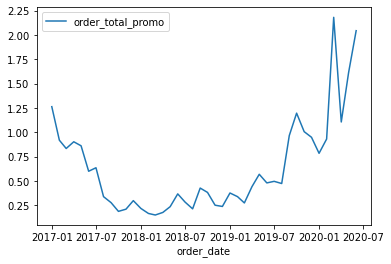

In [177]:
sns.lineplot(data=promo.groupby('order_date').mean())

<AxesSubplot:xlabel='order_date'>

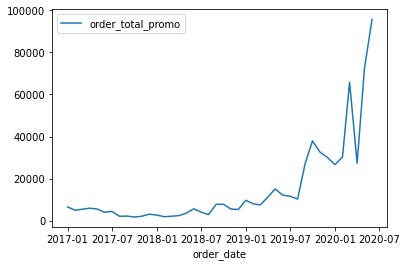

In [178]:
sns.lineplot(data=promo.groupby('order_date').sum())

In [159]:
transactions.order_total_promo.value_counts()

0.0     716018
5.0      13447
10.0     11658
8.0       7753
2.5       7441
         ...  
56.7         1
30.6         1
31.2         1
31.4         1
47.4         1
Name: order_total_promo, Length: 454, dtype: int64

In [157]:
promo.value_counts()

Series([], Name: order_total_promo, dtype: int64)

In [154]:
promo.fillna(0).reset_index().sum()

order_total_promo    0.0
dtype: float64

In [149]:
promo_by_month = promo.fillna(0).reset_index().groupby('order_date').mean()

In [153]:
promo_by_month.sum()

order_total_promo    0.0
dtype: float64

<AxesSubplot:xlabel='order_date', ylabel='order_total_promo'>

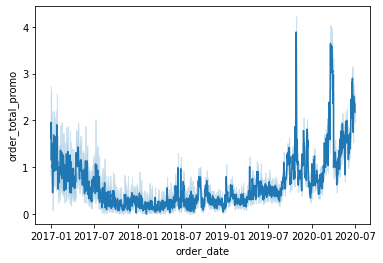

In [130]:
sns.lineplot(data=transactions, x='order_date', y='order_total_promo')

In [97]:
transactions.order_total_promo.value_counts()

0.0     716018
5.0      13447
10.0     11658
8.0       7753
2.5       7441
         ...  
56.7         1
30.6         1
31.2         1
31.4         1
47.4         1
Name: order_total_promo, Length: 454, dtype: int64

In [22]:
transactions[transactions.order_total_promo!=0]['order_total_promo'].describe()

count    91658.000000
mean         6.858665
std          4.932507
min          0.100000
25%          3.200000
50%          5.000000
75%         10.000000
max        101.900000
Name: order_total_promo, dtype: float64

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_total_promo'>

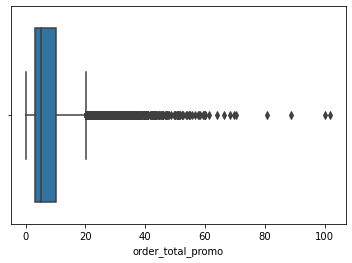

In [23]:
sns.boxplot(transactions[transactions.order_total_promo!=0]['order_total_promo'])

In [18]:
transactions[transactions.order_total_promo==0]['row_nb'].count()

716018

In [20]:
transactions[transactions.order_total_promo!=0]['row_nb'].count()

91658

In [26]:
transactions.select_dtypes('number').columns

Index(['row_nb', 'synthetic_gender', 'is_loyalty_deliveroo',
       'order_total_paid', 'order_delivery_fee', 'order_processing_fee',
       'order_total_fees', 'order_total_promo', 'is_customer_month_ubereats',
       'is_customer_month_justeat', 'is_customer_month_deliveroo',
       'order_hour'],
      dtype='object')

In [98]:
# pv vs order qty
# by region

#quel jour utilisation code promo

In [99]:
transactions.columns

Index(['row_nb', 'synthetic_gender', 'synthetic_age_generation',
       'is_loyalty_deliveroo', 'merchant_name', 'order_date', 'order_time',
       'order_total_paid', 'order_currency', 'payment_method_name',
       'order_delivery_fee', 'order_processing_fee', 'order_total_fees',
       'order_total_promo', 'seller_name', 'seller_category_name',
       'order_item_delivery_address_region',
       'order_item_delivery_address_subregion',
       'order_item_delivery_address_city', 'is_customer_month_ubereats',
       'is_customer_month_justeat', 'is_customer_month_deliveroo',
       'order_hour'],
      dtype='object')

In [131]:
transactions['promo']=transactions.fillna(0).order_total_promo!=0

In [133]:
transactions_by_price = transactions[transactions.order_total_paid>=1].groupby(['order_total_paid','promo']).count().reset_index()[['order_total_paid','row_nb','promo']]
transactions_by_price

,order_total_paid,row_nb,promo
0,1.0,1843,False
1,1.0,104,True
2,1.1,3,False
3,1.1,57,True
4,1.2,1,False
...,...,...,...
2446,369.9,1,False
2447,390.4,1,True
2448,443.2,1,False
2449,461.7,1,True


In [208]:
promo_pivot = transactions_by_price.pivot(columns='promo', values='row_nb', index='order_total_paid').fillna(0)

In [212]:
promo_pivot

promo,False,True
order_total_paid,,
1.0,1843.0,104.0
1.1,3.0,57.0
1.2,1.0,55.0
1.3,3.0,54.0
1.4,0.0,52.0
...,...,...
369.9,1.0,0.0
390.4,0.0,1.0
443.2,1.0,0.0


In [211]:
promo_pivot.corr()

promo,False,True
promo,,
False,1.000000,0.953234
True,0.953234,1.000000


In [119]:
transactions_by_price.describe()

,order_total_paid,row_nb
count,1508.000000,1508.000000
mean,83.183753,465.876658
std,61.614339,905.236748
min,1.000000,1.000000
25%,38.675000,2.000000
50%,76.350000,24.000000
75%,114.725000,366.500000
max,943.600000,3870.000000


In [134]:
transactions_by_price_s = transactions_by_price[(transactions_by_price.row_nb >=2) & \
                                                (transactions_by_price.row_nb <=367)]

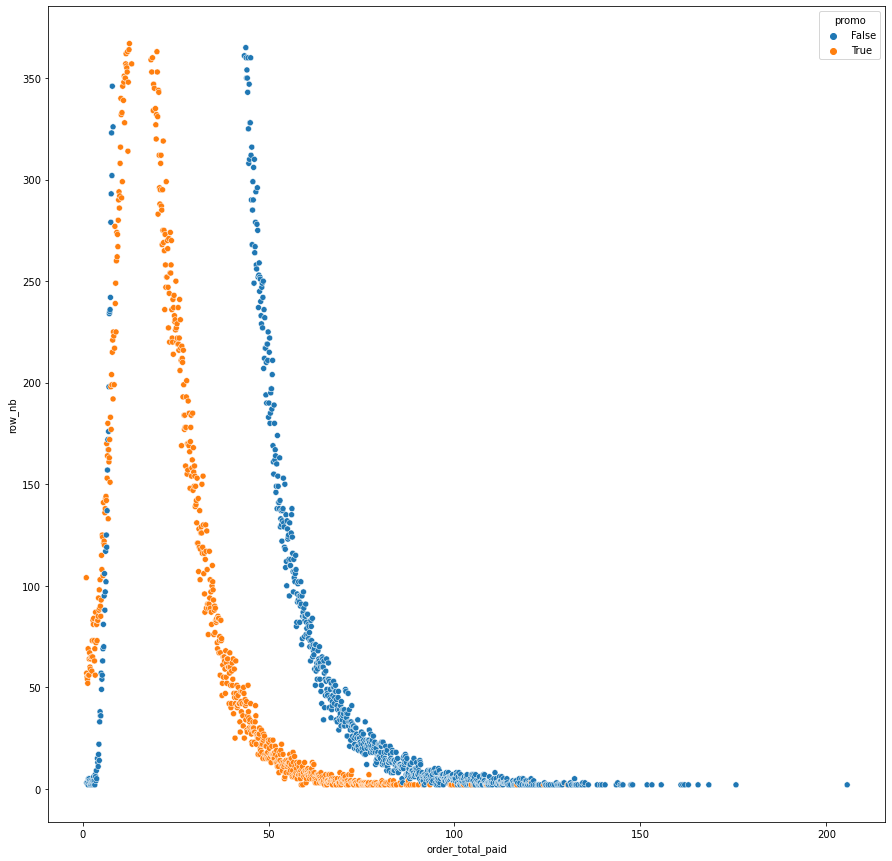

In [175]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=transactions_by_price_s['order_total_paid'], 
                y=transactions_by_price_s['row_nb'], hue=transactions_by_price_s['promo']);

In [108]:
transactions[(transactions.order_total_paid==0) & (transactions.merchant_name!='just eat') & \
            (transactions.order_total_promo==0)]

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,...,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,order_hour
1939,1940,1.0,Gen. Y - [1980-1994],NaN,deliveroo,2019-12-29,20:00:00,0.0,eur,NaN,...,0.0,bollynan,asian - indian,ile de france,paris,paris,0,0,1,20
3131,3132,1.0,Gen. Y - [1980-1994],NaN,deliveroo,2018-01-07,23:00:00,0.0,eur,NaN,...,0.0,guangzhou,asian - chinese,auvergne rhone alpes,rhone,villeurbanne,1,0,1,23
7108,7109,2.0,Gen. Z - [1995-2010],0.0,deliveroo,2019-04-22,19:00:00,0.0,eur,NaN,...,0.0,my wok,asian - thai,bourgogne franche comte,doubs,besancon,0,0,1,19
7667,7668,1.0,Gen. Y - [1980-1994],NaN,deliveroo,2019-06-18,13:00:00,0.0,eur,NaN,...,0.0,subway,north american - sandwich,ile de france,paris,paris,1,0,1,13
7786,7787,2.0,Gen. Y - [1980-1994],NaN,uber eats,2020-05-16,19:00:00,0.0,eur,payment card - visa,...,0.0,mcdonald's,north american - burger,ile de france,hauts de seine,levallois perret,1,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800121,800122,2.0,Gen. Y - [1980-1994],NaN,deliveroo,2018-06-24,19:00:00,0.0,eur,NaN,...,0.0,chipotle,latin american - mexican,ile de france,paris,paris,0,0,1,19
801530,801531,1.0,Gen. Y - [1980-1994],NaN,deliveroo,2017-08-22,21:00:00,0.0,eur,NaN,...,0.0,sushi dozo,asian - japanese - sushi,nouvelle aquitaine,gironde,bordeaux,0,0,1,21
805229,805230,1.0,Gen. Z - [1995-2010],NaN,deliveroo,2019-12-30,21:00:00,0.0,eur,NaN,...,0.0,burger king,north american - burger,auvergne rhone alpes,isere,grenoble,1,0,1,21
805626,805627,1.0,NaN,NaN,deliveroo,2017-04-10,23:00:00,0.0,eur,NaN,...,0.0,mamma roma,european - italian - others,ile de france,hauts de seine,levallois perret,0,0,1,23


In [109]:
transactions[(transactions.payment_method_name.isna()) & (transactions.merchant_name!='just eat')]

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,...,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,order_hour
0,1,2.0,Gen. Y - [1980-1994],NaN,deliveroo,2020-01-15,12:00:00,10.3,eur,NaN,...,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,12
3,4,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-01-11,21:00:00,0.0,eur,NaN,...,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0,21
4,5,NaN,Gen. Z - [1995-2010],NaN,deliveroo,2019-12-15,20:00:00,25.3,eur,NaN,...,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,20
6,7,1.0,Gen. Y - [1980-1994],NaN,deliveroo,2017-06-17,19:00:00,29.1,eur,NaN,...,0.0,arbol,asian - indian,nouvelle aquitaine,gironde,bordeaux,0,0,1,19
9,10,1.0,Gen. Y - [1980-1994],NaN,just eat,2017-03-12,18:00:00,0.6,eur,NaN,...,0.0,NaN,NaN,nouvelle aquitaine,haute vienne,limoges,0,1,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807663,807664,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-12-16,23:00:00,NaN,eur,NaN,...,0.0,pizza lyonnaise,european - italian - pizza,auvergne rhone alpes,rhone,lyon,0,1,0,23
807664,807665,1.0,Gen. X - [1960-1979],NaN,deliveroo,2018-12-18,21:00:00,35.2,eur,NaN,...,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,21
807667,807668,2.0,NaN,NaN,deliveroo,2019-01-28,19:00:00,13.6,eur,NaN,...,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,19
807670,807671,1.0,Gen. Z - [1995-2010],NaN,deliveroo,2020-01-20,12:00:00,24.5,eur,NaN,...,0.0,waffle factory,others,provence alpes cote d azur,bouches du rhone,marseille,0,0,1,12


### promo by week day

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


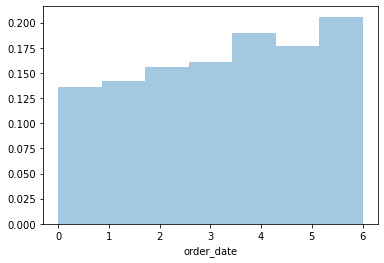

In [165]:
# distribution en fct du jour de la semaine
# The day of the week with Monday=0, Sunday=6.
sns.distplot(transactions[(transactions.fillna(0).order_total_promo!=0) & \
                         (transactions.fillna(0).order_total_promo<=30) & \
                         (transactions.order_date > '2017/06/30')].order_date.dt.dayofweek, bins=7, kde=False,
                    norm_hist=True);

In [166]:
transactions['order_weekday']=transactions.order_date.dt.dayofweek

In [169]:
promo_by_weekday = transactions[transactions['order_total_promo'] <= 30].fillna(0).groupby('order_weekday').\
                sum()[['order_total_promo','order_total_paid']]
promo_by_weekday['promo_pct'] = promo_by_weekday['order_total_promo'] / promo_by_weekday['order_total_paid']
promo_by_weekday

,order_total_promo,order_total_paid,promo_pct
order_weekday,,,
0,69153.6,1979913.2,0.034928
1,76231.6,2034480.5,0.037470
2,81669.9,2168366.4,0.037664
3,84092.4,2244441.2,0.037467
4,101317.2,2605342.6,0.038888
5,93470.6,2532559.6,0.036908
6,107788.3,2975612.8,0.036224


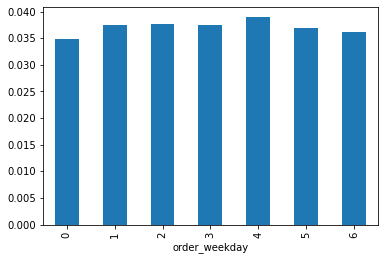

In [171]:
# promo % by month
promo_by_weekday['promo_pct'].plot(kind='bar');

### promo by month

/Users/philippepouget/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


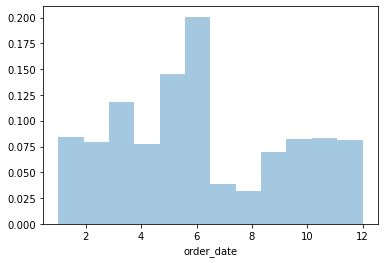

In [144]:
# distribution du nombre de coupon promo en fct du mois
sns.distplot(transactions[(transactions.fillna(0).order_total_promo!=0) & \
                         (transactions.fillna(0).order_total_promo<=30) & \
                         (transactions.order_date > '2017/06/30')].order_date.dt.month, bins=12, kde=False,
             norm_hist=True);

In [160]:
transactions['order_month']=transactions.order_date.dt.month

In [161]:
# promo by month
promo_by_month = transactions[transactions['order_total_promo'] <= 30].fillna(0).groupby('order_month').\
                sum()[['order_total_promo','order_total_paid']]
promo_by_month['promo_pct'] = promo_by_month['order_total_promo'] / promo_by_month['order_total_paid']
promo_by_month

,order_total_promo,order_total_paid,promo_pct
order_month,,,
1,44410.7,1540313.8,0.028832
2,43690.6,1458399.2,0.029958
3,78696.0,1524262.4,0.051629
4,45113.8,1467527.3,0.030741
5,93628.8,2061414.6,0.045420
6,114761.2,1996733.5,0.057474
7,19156.4,876400.8,0.021858
8,14420.6,807667.7,0.017855
9,36338.7,1047140.8,0.034703


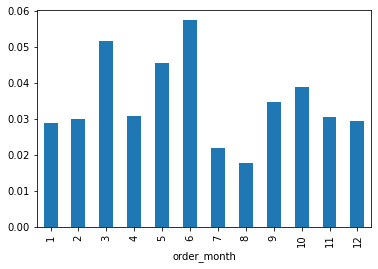

In [163]:
# promo % by month
promo_by_month['promo_pct'].plot(kind='bar');

### panier moyen avec et sans code promo

In [219]:
# panier moyen hors promo (hors just eat)
transactions[(transactions.order_total_promo==0) & \
             (transactions.merchant_name!='just eat')]['order_total_paid'].mean()

23.988258512047576

In [220]:
# panier moyen avec code promo
transactions[(transactions.order_total_promo!=0) & \
             (transactions.order_total_promo<=20) &\
             (transactions.merchant_name!='just eat')]['order_total_paid'].mean()

20.21676950393956

In [221]:
transactions[(transactions.order_total_promo!=0) & \
             (transactions.order_total_promo<=20) &\
             (transactions.merchant_name!='just eat')]['order_total_promo'].mean()

6.50446565309079

In [215]:
transactions[transactions.order_total_promo==0]['order_total_paid'].count()

685811

In [217]:
transactions[(transactions.order_total_promo!=0) & \
             (transactions.order_total_promo<=20)]['order_total_paid'].count()

90110

## payment method

In [153]:
payment_method_freq = transactions['payment_method_name'].value_counts()
payment_method_freq

payment card - visa                                       224590
payment card - mastercard                                 120224
paypal                                                     77855
applepay                                                   10701
payment card - american express                             5752
lunchr_card_icon; visa                                       443
unavailable_asset                                            354
edenred                                                      302
lunchr_card_icon; paypal                                     277
visa; imgjoulet1                                             270
lunchr_card_icon; mastercard                                 238
payment card                                                 216
mastercard; imgjoulet1                                       165
paypal; imgjoulet1                                           165
visa; imgjoulet2                                             155
mastercard; imgjoulet2   

In [157]:
# 442379 payment method enregistrés
# les méthode de paiement dont la fréquence est moins de 500 représentent 0.7% du total
payment_method_freq[payment_method_freq < 500].sum() / payment_method_freq.sum()

0.007362465216477274

In [161]:
payment_method_freq_clean = payment_method_freq[payment_method_freq > 500]
payment_method_freq_clean = payment_method_freq_clean.\
    append(pd.Series({'other': payment_method_freq[payment_method_freq < 500].sum()}))
payment_method_freq_clean

payment card - visa                224590
payment card - mastercard          120224
paypal                              77855
applepay                            10701
payment card - american express      5752
Name: payment_method_name, dtype: int64

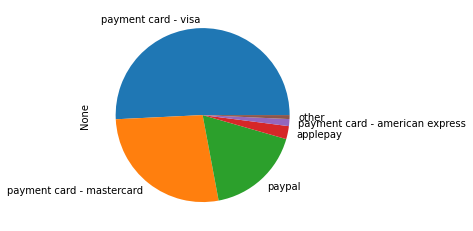

In [174]:
payment_method_freq_clean.plot.pie();

In [22]:
transactions.seller_category_name.value_counts()

north american - burger        214127
european - italian - pizza      67905
latin american - mexican        59627
asian - japanese - sushi        49918
north american - chicken        34757
north american - sandwich       30364
european - french               29254
asian - thai                    24824
european - italian - others     20491
asian - indian                  20398
north american - others         19487
north american - hawaiian       18122
others                          17101
asian - japanese - others       16722
middle eastern - kebab          15455
asian - vietnamese              15075
asian - others                  13444
asian - chinese                 10206
middle eastern - lebanese        9741
european - salad                 8034
north american - bbq             7557
european - others                7438
middle eastern - others          4454
asian - korean                   4013
african                          3709
european - italian - pasta       2704
latin americ

In [21]:
transactions[transactions.seller_category_name == 'north american - burger'].\
    synthetic_gender.value_counts(normalize=True)

1.0    0.711375
2.0    0.288625
Name: synthetic_gender, dtype: float64

In [23]:
transactions[transactions.seller_category_name == 'asian - japanese - sushi'].\
    synthetic_gender.value_counts(normalize=True)

1.0    0.613606
2.0    0.386394
Name: synthetic_gender, dtype: float64

In [24]:
transactions[transactions.seller_category_name == 'others'].\
    synthetic_gender.value_counts(normalize=True)

1.0    0.665372
2.0    0.334628
Name: synthetic_gender, dtype: float64

In [32]:
transactions[transactions.order_date.str.contains('2020-06')].seller_name.nunique()

8655

In [33]:
transactions[transactions.order_date.str.contains('2019-06')].seller_name.nunique()

4376

In [34]:
transactions[transactions.order_date.str.contains('2018-06')].seller_name.nunique()

2418

## sellers

In [218]:
seller_freq = transactions.seller_name.value_counts()

In [219]:
seller_freq.describe()

count     24481.000000
mean         29.939913
std         708.457046
min           1.000000
25%           1.000000
50%           4.000000
75%          13.000000
max      101102.000000
Name: seller_name, dtype: float64

In [183]:
seller_freq[seller_freq >= 500]

mcdonald's          101102
kfc                  21450
o'tacos              20833
burger king          18171
subway               15847
                     ...  
le ruisseau            518
la pizza de nico       514
fufu                   510
kokomo                 506
bricktop pizza         504
Name: seller_name, Length: 140, dtype: int64

In [189]:
seller_freq[seller_freq < 50].sum() / seller_freq.sum()

0.23391212878210105

In [224]:
seller_freq[:20]

mcdonald's             101102
kfc                     21450
o'tacos                 20833
burger king             18171
subway                  15847
big fernand             13941
pizza hut                8154
sushi shop               7224
pitaya                   5810
pokawa                   4898
les burgers de papa      3914
planet sushi             3492
chamas tacos             3118
pokai                    3070
tacos avenue             2827
basilic & co             2766
quick                    2377
poke me                  2178
five pizza original      2174
five guys                2129
Name: seller_name, dtype: int64

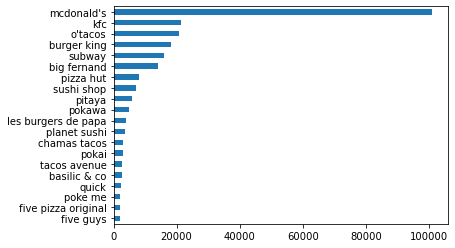

In [233]:
seller_freq[:20][::-1].plot(kind='barh');

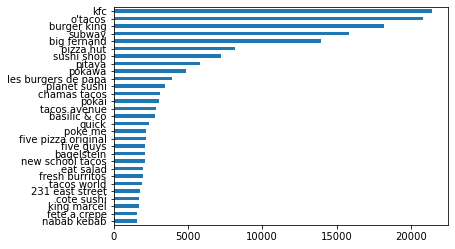

In [234]:
seller_freq[1:30][::-1].plot(kind='barh');

In [31]:
seller_freq[seller_freq >= 500]

mcdonald's          101102
kfc                  21450
o'tacos              20833
burger king          18171
subway               15847
                     ...  
le ruisseau            518
la pizza de nico       514
fufu                   510
kokomo                 506
bricktop pizza         504
Name: seller_name, Length: 140, dtype: int64

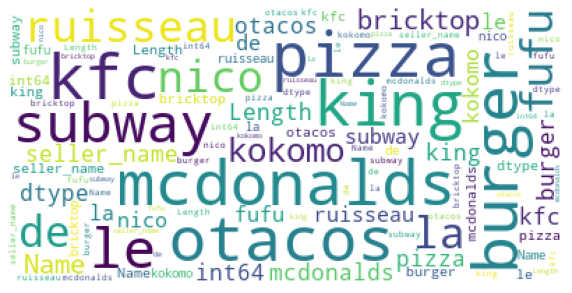

In [34]:
wordcloud(seller_freq[seller_freq >= 500])

### top 3 sellers by month

In [117]:
transactions['year_month']=transactions.order_date.dt.to_period('M')  #.dt.to_timestamp()

In [10]:
transactions[transactions.year_month=='2017-01'].seller_name.value_counts().reset_index()[:3]

,index,seller_name
0,big fernand,231
1,les burgers de papa,48
2,231 east street,41


In [17]:
transactions.year_month.unique()

<PeriodArray>
['2020-01', '2019-01', '2020-02', '2019-12', '2018-09', '2017-06', '2018-12',
 '2019-11', '2017-03', '2020-05', '2019-10', '2019-06', '2019-08', '2019-07',
 '2017-11', '2018-11', '2018-10', '2019-02', '2019-05', '2020-06', '2020-04',
 '2018-03', '2018-05', '2019-03', '2017-07', '2018-07', '2020-03', '2018-06',
 '2018-02', '2019-04', '2017-12', '2019-09', '2018-08', '2018-04', '2017-10',
 '2017-09', '2018-01', '2017-02', '2017-08', '2017-04', '2017-05', '2017-01']
Length: 42, dtype: period[M]

In [66]:
top3 = transactions[transactions.year_month=='2020-01'].seller_name.value_counts().reset_index()[:3]

In [67]:
top3

,index,seller_name
0,mcdonald's,4694
1,kfc,1141
2,o'tacos,1057


In [123]:
transactions.columns

Index(['row_nb', 'synthetic_gender', 'synthetic_age_generation',
       'is_loyalty_deliveroo', 'merchant_name', 'order_date', 'order_time',
       'order_total_paid', 'order_currency', 'payment_method_name',
       'order_delivery_fee', 'order_processing_fee', 'order_total_fees',
       'order_total_promo', 'seller_name', 'seller_category_name',
       'order_item_delivery_address_region',
       'order_item_delivery_address_subregion',
       'order_item_delivery_address_city', 'is_customer_month_ubereats',
       'is_customer_month_justeat', 'is_customer_month_deliveroo',
       'year_month'],
      dtype='object')

In [127]:
((transactions.seller_name=="mcdonald's") & (transactions.year_month=='2020-04')).sum()

397

In [113]:
#top 10
top_resto = transactions[transactions.year_month=='2020-01'].seller_name.value_counts().reset_index()[:10]
top_resto['year_month']=pd.to_datetime('2020-01')
for m in transactions.year_month.unique()[1:]:
    topm = transactions[transactions.year_month==m].seller_name.value_counts().reset_index()[:10]
    topm['year_month']=m.to_timestamp()
    top_resto=pd.concat([top_resto,topm])
top_resto.reset_index(inplace=True)
top_resto.columns=['top', 'restaurant', 'nb', 'year_month']
top_resto.top+=1
top_resto.to_csv('top_resto.csv')
top_resto

,top,restaurant,nb,year_month
0,1,mcdonald's,4694,2020-01-01
1,2,kfc,1141,2020-01-01
2,3,o'tacos,1057,2020-01-01
3,4,burger king,878,2020-01-01
4,5,subway,839,2020-01-01
...,...,...,...,...
415,6,nina sushi,35,2017-01-01
416,7,starvin' joe,28,2017-01-01
417,8,le petit cambodge,27,2017-01-01
418,9,fresh burritos,24,2017-01-01


In [68]:
top3 = transactions[transactions.year_month=='2020-01'].seller_name.value_counts().reset_index()[:3]
top3['year_month']=pd.to_datetime('2020-01')
for m in transactions.year_month.unique()[1:]:
    top3m = transactions[transactions.year_month==m].seller_name.value_counts().reset_index()[:3]
    top3m['year_month']=m.to_timestamp()
    top3=pd.concat([top3,top3m])
top3.sort_values('year_month')

,index,seller_name,year_month
2,231 east street,41,2017-01-01
0,big fernand,231,2017-01-01
1,les burgers de papa,48,2017-01-01
2,les burgers de papa,44,2017-02-01
0,big fernand,213,2017-02-01
...,...,...,...
2,kfc,1799,2020-05-01
1,burger king,2281,2020-05-01
0,mcdonald's,6309,2020-06-01
1,burger king,2824,2020-06-01


In [69]:
top3.reset_index(inplace=True)

In [71]:
top3.columns=['top', 'restaurant', 'nb', 'year_month']

In [72]:
top3.top+=1

In [74]:
top3 = top3.sort_values(['year_month','top'])

In [75]:
top3

,top,restaurant,nb,year_month
123,1,big fernand,231,2017-01-01
124,2,les burgers de papa,48,2017-01-01
125,3,231 east street,41,2017-01-01
111,1,big fernand,213,2017-02-01
112,2,sushi shop,55,2017-02-01
...,...,...,...,...
28,2,burger king,2281,2020-05-01
29,3,kfc,1799,2020-05-01
57,1,mcdonald's,6309,2020-06-01
58,2,burger king,2824,2020-06-01


In [77]:
top3.restaurant.unique()

array(['big fernand', 'les burgers de papa', '231 east street',
       'sushi shop', 'bagelstein', "mcdonald's", 'planet sushi', 'kfc',
       "o'tacos", 'subway', 'burger king', 'pizza hut'], dtype=object)

In [81]:
top3p = top3.pivot(index='restaurant', columns='year_month', values='nb')

In [90]:
top3p=top3p.T.reset_index()

In [91]:
top3p

restaurant,year_month,231 east street,bagelstein,big fernand,burger king,kfc,les burgers de papa,mcdonald's,o'tacos,pizza hut,planet sushi,subway,sushi shop
0,2017-01-01,41.0,NaN,231.0,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-01,NaN,NaN,213.0,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,55.0
2,2017-03-01,NaN,58.0,225.0,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01,52.0,51.0,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-01,NaN,NaN,249.0,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,45.0
5,2017-06-01,NaN,NaN,271.0,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,67.0
6,2017-07-01,NaN,NaN,215.0,NaN,NaN,NaN,497.0,NaN,NaN,NaN,NaN,66.0
7,2017-08-01,NaN,NaN,176.0,NaN,NaN,NaN,413.0,NaN,NaN,NaN,NaN,63.0
8,2017-09-01,NaN,NaN,235.0,NaN,NaN,NaN,540.0,NaN,NaN,72.0,NaN,NaN
9,2017-10-01,NaN,NaN,273.0,NaN,NaN,NaN,1021.0,NaN,NaN,NaN,NaN,92.0


In [93]:
top3p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month           42 non-null     datetime64[ns]
 1   231 east street      2 non-null      float64       
 2   bagelstein           2 non-null      float64       
 3   big fernand          17 non-null     float64       
 4   burger king          11 non-null     float64       
 5   kfc                  23 non-null     float64       
 6   les burgers de papa  4 non-null      float64       
 7   mcdonald's           36 non-null     float64       
 8   o'tacos              18 non-null     float64       
 9   pizza hut            1 non-null      float64       
 10  planet sushi         1 non-null      float64       
 11  subway               5 non-null      float64       
 12  sushi shop           6 non-null      float64       
dtypes: datetime64[ns](1), float64(12)
mem

In [102]:
top3

,top,restaurant,nb,year_month
123,1,big fernand,231,2017-01-01
124,2,les burgers de papa,48,2017-01-01
125,3,231 east street,41,2017-01-01
111,1,big fernand,213,2017-02-01
112,2,sushi shop,55,2017-02-01
...,...,...,...,...
28,2,burger king,2281,2020-05-01
29,3,kfc,1799,2020-05-01
57,1,mcdonald's,6309,2020-06-01
58,2,burger king,2824,2020-06-01


In [109]:
top3.to_csv('top3.csv')

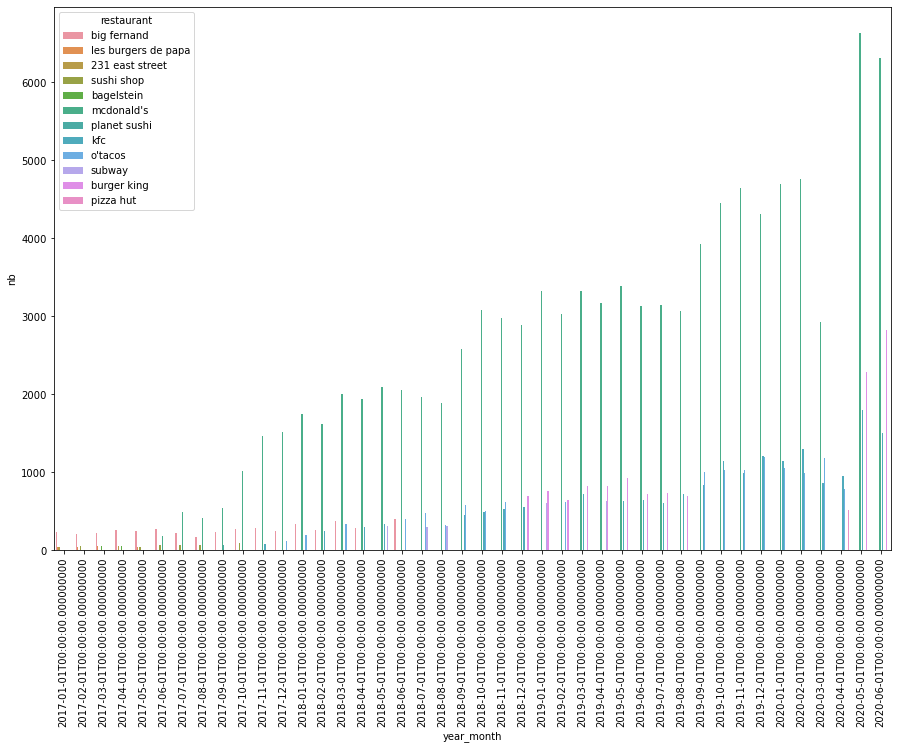

In [111]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)

sns.barplot(data=top3, x='year_month', y='nb', hue='restaurant');


## seller category frequency

In [17]:
seller_cat_freq = transactions.seller_category_name.value_counts()
seller_cat_freq

north american - burger        214127
european - italian - pizza      67905
latin american - mexican        59627
asian - japanese - sushi        49918
north american - chicken        34757
north american - sandwich       30364
european - french               29254
asian - thai                    24824
european - italian - others     20491
asian - indian                  20398
north american - others         19487
north american - hawaiian       18122
others                          17101
asian - japanese - others       16722
middle eastern - kebab          15455
asian - vietnamese              15075
asian - others                  13444
asian - chinese                 10206
middle eastern - lebanese        9741
european - salad                 8034
north american - bbq             7557
european - others                7438
middle eastern - others          4454
asian - korean                   4013
african                          3709
european - italian - pasta       2704
latin americ

In [24]:
seller_cat_freq.index

Index(['north american - burger', 'european - italian - pizza',
       'latin american - mexican', 'asian - japanese - sushi',
       'north american - chicken', 'north american - sandwich',
       'european - french', 'asian - thai', 'european - italian - others',
       'asian - indian', 'north american - others',
       'north american - hawaiian', 'others', 'asian - japanese - others',
       'middle eastern - kebab', 'asian - vietnamese', 'asian - others',
       'asian - chinese', 'middle eastern - lebanese', 'european - salad',
       'north american - bbq', 'european - others', 'middle eastern - others',
       'asian - korean', 'african', 'european - italian - pasta',
       'latin american - others', 'north american - bagel',
       'european - spanish', 'european - british',
       'latin american - peruvian'],
      dtype='object')

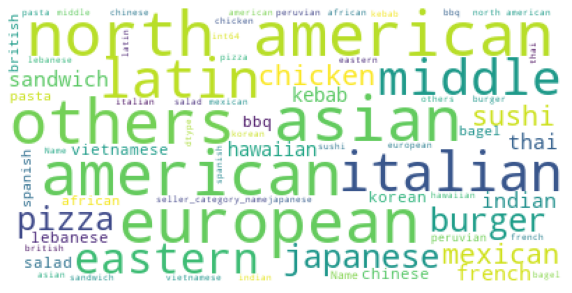

In [23]:
wordcloud(seller_cat_freq)

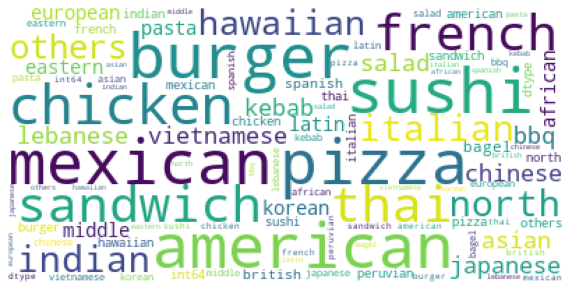

In [26]:
wordcloud(pd.Series(index=['burger', 'pizza', 'mexican', 'sushi', 'chicken', 'sandwich',
       'french', 'thai', 'italian', 'indian', 'north american',
       'hawaiian', 'others', 'japanese', 'kebab', 'vietnamese', 'asian',
       'chinese', 'lebanese', 'salad', 'bbq', 'european', 'middle eastern',
       'korean', 'african', 'pasta', 'latin american', 'bagel',
       'spanish', 'british', 'peruvian'], data=seller_cat_freq.values))

In [19]:
seller_cat_freq2= seller_cat_freq / seller_cat_freq.sum()
seller_cat_freq2

north american - burger        0.294186
european - italian - pizza     0.093294
latin american - mexican       0.081921
asian - japanese - sushi       0.068582
north american - chicken       0.047752
north american - sandwich      0.041717
european - french              0.040192
asian - thai                   0.034105
european - italian - others    0.028152
asian - indian                 0.028025
north american - others        0.026773
north american - hawaiian      0.024898
others                         0.023495
asian - japanese - others      0.022974
middle eastern - kebab         0.021233
asian - vietnamese             0.020711
asian - others                 0.018471
asian - chinese                0.014022
middle eastern - lebanese      0.013383
european - salad               0.011038
north american - bbq           0.010382
european - others              0.010219
middle eastern - others        0.006119
asian - korean                 0.005513
african                        0.005096


In [20]:
seller_cat_freq2[:10].sum()

0.7579252660531804

In [206]:
seller_cat_freq2.shape

(31,)

### seller category over time

In [137]:
transactions.year_month.unique()

<PeriodArray>
['2020-01', '2019-01', '2020-02', '2019-12', '2018-09', '2017-06', '2018-12',
 '2019-11', '2017-03', '2020-05', '2019-10', '2019-06', '2019-08', '2019-07',
 '2017-11', '2018-11', '2018-10', '2019-02', '2019-05', '2020-06', '2020-04',
 '2018-03', '2018-05', '2019-03', '2017-07', '2018-07', '2020-03', '2018-06',
 '2018-02', '2019-04', '2017-12', '2019-09', '2018-08', '2018-04', '2017-10',
 '2017-09', '2018-01', '2017-02', '2017-08', '2017-04', '2017-05', '2017-01']
Length: 42, dtype: period[M]

In [138]:
transactions.columns

Index(['row_nb', 'synthetic_gender', 'synthetic_age_generation',
       'is_loyalty_deliveroo', 'merchant_name', 'order_date', 'order_time',
       'order_total_paid', 'order_currency', 'payment_method_name',
       'order_delivery_fee', 'order_processing_fee', 'order_total_fees',
       'order_total_promo', 'seller_name', 'seller_category_name',
       'order_item_delivery_address_region',
       'order_item_delivery_address_subregion',
       'order_item_delivery_address_city', 'is_customer_month_ubereats',
       'is_customer_month_justeat', 'is_customer_month_deliveroo',
       'year_month'],
      dtype='object')

In [139]:
#top 10
top_cat = transactions[transactions.year_month=='2020-01'].seller_category_name.value_counts().reset_index()[:10]
top_cat['year_month']=pd.to_datetime('2020-01')
for m in transactions.year_month.unique()[1:]:
    topm = transactions[transactions.year_month==m].seller_category_name.value_counts().reset_index()[:10]
    topm['year_month']=m.to_timestamp()
    top_cat=pd.concat([top_cat,topm])
top_cat.reset_index(inplace=True)
top_cat.columns=['top', 'seller_category', 'nb', 'year_month']
top_cat.top+=1
top_cat.to_csv('top_resto_cat.csv')
top_cat

,top,seller_category,nb,year_month
0,1,north american - burger,9545,2020-01-01
1,2,european - italian - pizza,3610,2020-01-01
2,3,latin american - mexican,2899,2020-01-01
3,4,asian - japanese - sushi,2310,2020-01-01
4,5,north american - chicken,1867,2020-01-01
...,...,...,...,...
415,6,asian - thai,204,2017-01-01
416,7,asian - indian,167,2017-01-01
417,8,north american - others,162,2017-01-01
418,9,north american - sandwich,149,2017-01-01


## order_item_delivery_address_region

In [209]:
order_region_freq = transactions.order_item_delivery_address_region.value_counts(normalize=True)
order_region_freq

ile de france                 0.490047
auvergne rhone alpes          0.116290
occitanie                     0.074922
nouvelle aquitaine            0.064063
provence alpes cote d azur    0.056151
hauts de france               0.050540
grand est                     0.044233
pays de la loire              0.036998
bretagne                      0.022527
normandie                     0.019044
centre val de loire           0.014675
bourgogne franche comte       0.010263
reunion                       0.000164
corse                         0.000075
greater london                0.000005
cataluna                      0.000001
canarias                      0.000001
Name: order_item_delivery_address_region, dtype: float64

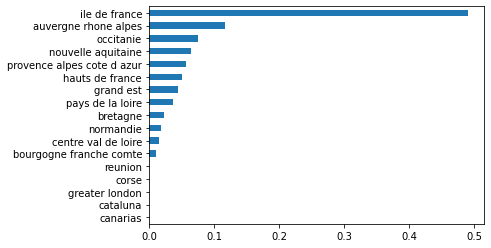

In [244]:
order_region_freq[::-1].plot(kind='barh');

In [190]:
transactions.columns

Index(['row_nb', 'synthetic_gender', 'synthetic_age_generation',
       'is_loyalty_deliveroo', 'merchant_name', 'order_date', 'order_time',
       'order_total_paid', 'order_currency', 'payment_method_name',
       'order_delivery_fee', 'order_processing_fee', 'order_total_fees',
       'order_total_promo', 'seller_name', 'seller_category_name',
       'order_item_delivery_address_region',
       'order_item_delivery_address_subregion',
       'order_item_delivery_address_city', 'is_customer_month_ubereats',
       'is_customer_month_justeat', 'is_customer_month_deliveroo',
       'order_hour', 'promo', 'order_month', 'order_weekday', 'year_month'],
      dtype='object')

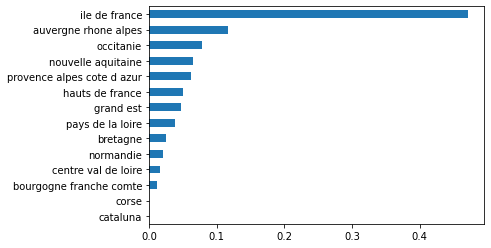

In [195]:
order_region_freq_2019 = transactions[transactions.order_date.dt.year==2019].order_item_delivery_address_region.\
    value_counts(normalize=True)
order_region_freq_2019[::-1].plot(kind='barh');

In [191]:
order_region_freq_2020 = transactions[transactions.order_date.dt.year==2020].order_item_delivery_address_region.\
    value_counts(normalize=True)
order_region_freq_2020

ile de france                 0.440988
auvergne rhone alpes          0.119345
occitanie                     0.080092
nouvelle aquitaine            0.066390
provence alpes cote d azur    0.057588
hauts de france               0.056738
grand est                     0.055393
pays de la loire              0.038373
bretagne                      0.027665
normandie                     0.023550
centre val de loire           0.018897
bourgogne franche comte       0.014154
reunion                       0.000627
corse                         0.000195
canarias                      0.000005
Name: order_item_delivery_address_region, dtype: float64

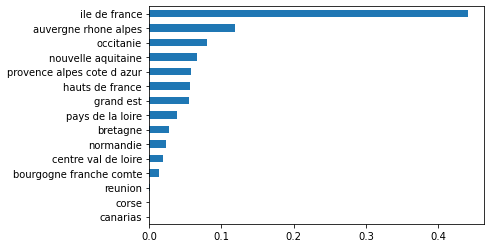

In [194]:
order_region_freq_2020[::-1].plot(kind='barh');

## order_item_delivery_address_subregion

In [220]:
# subregion pour l'Ile de France
order_subregion_freq = transactions[transactions.order_item_delivery_address_region=='ile de france'].order_item_delivery_address_subregion.value_counts(normalize=True)
order_subregion_freq

paris                0.519797
hauts de seine       0.178113
val de marne         0.090863
seine saint denis    0.079606
yvelines             0.042001
val d oise           0.034629
essonne              0.031372
seine et marne       0.023619
Name: order_item_delivery_address_subregion, dtype: float64

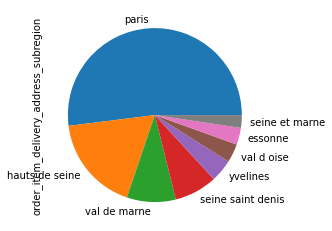

In [221]:
order_subregion_freq.plot.pie();

## order_item_delivery_address_city

In [189]:
transactions[transactions.order_item_delivery_address_subregion=='paris'].\
    order_item_delivery_address_city.value_counts()

paris    204474
Name: order_item_delivery_address_city, dtype: int64

In [222]:
order_city_freq = transactions[transactions.order_item_delivery_address_subregion=='paris'].\
    order_item_delivery_address_city.value_counts(normalize=True)
order_city_freq

paris    1.0
Name: order_item_delivery_address_city, dtype: float64

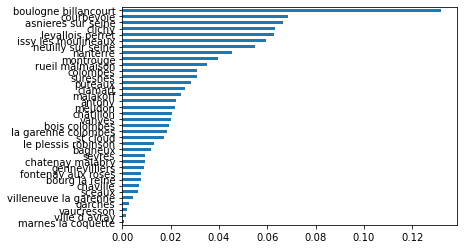

In [235]:
order_city_freq = transactions[transactions.order_item_delivery_address_subregion=='hauts de seine'].\
    order_item_delivery_address_city.value_counts(normalize=True)
order_city_freq[::-1].plot(kind='barh');

In [237]:
#raw data for tableau map plot
transactions[transactions.order_item_delivery_address_subregion=='hauts de seine'].\
    order_item_delivery_address_city.value_counts().to_csv('order_city_freq_92.csv')

In [238]:
#raw data for tableau map plot
transactions.order_item_delivery_address_city.value_counts().to_csv('order_city_freq_france.csv')

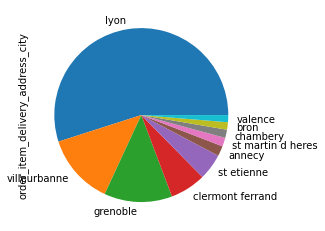

In [188]:
# rhone alpes
order_city_freq_top10 = transactions[transactions.order_item_delivery_address_region=='auvergne rhone alpes'].\
    order_item_delivery_address_city.value_counts() [:10]
order_city_freq_top10.plot(kind='pie');

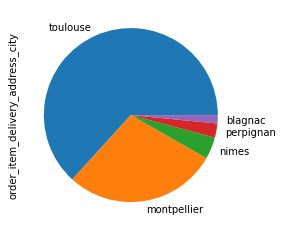

In [182]:
# occitanie
order_city_freq_top5 = transactions[transactions.order_item_delivery_address_region=='occitanie'].\
    order_item_delivery_address_city.value_counts()[:5]
order_city_freq_top5.plot(kind='pie');

In [40]:
((transactions.order_total_paid >=10) & (transactions.order_total_paid <=20)).sum() / len(transactions)

0.3897652028783819